# **IMPORT**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.pipeline import Pipeline
import glob

# **EDA**

In [3]:
student_info = pd.read_csv("studentInfo.csv")
student_reg = pd.read_csv("studentRegistration.csv")
student_assess = pd.read_csv("studentAssessment.csv")
student_vle = pd.read_csv("studentVle.csv")
assessments = pd.read_csv("assessments.csv")
vle = pd.read_csv("vle.csv")
courses = pd.read_csv("courses.csv")

In [4]:
print("Dataset Shapes\n")
dfs = {
    "student_info": student_info,
    "student_reg": student_reg,
    "student_assess": student_assess,
    "student_vle": student_vle,
    "assessments": assessments,
    "vle": vle,
    "courses": courses
}

for name, df in dfs.items():
    print(f"{name}: {df.shape}")

Dataset Shapes

student_info: (32593, 12)
student_reg: (32593, 5)
student_assess: (173912, 5)
student_vle: (10655280, 6)
assessments: (206, 6)
vle: (6364, 6)
courses: (22, 3)


In [5]:
print("studentInfo")
student_info.info()
print("\nstudentRegistration")
student_reg.info()
print("\nstudentAssessment")
student_assess.info()
print("\nstudentVle")
student_vle.info()
print("\nassessments")
assessments.info()
print("\nvle")
vle.info()
print("\ncourses")
courses.info()

studentInfo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB

studentRegistration
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):


In [6]:
for name, df in dfs.items():
    print(f"\nMissing values in {name}:")
    print(df.isna().sum())


Missing values in student_info:
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Missing values in student_reg:
code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

Missing values in student_assess:
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

Missing values in student_vle:
code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

Missing values in assessments:
code_module           0
code_presentation  


===== VISUALIZATION FOR: student_info =====


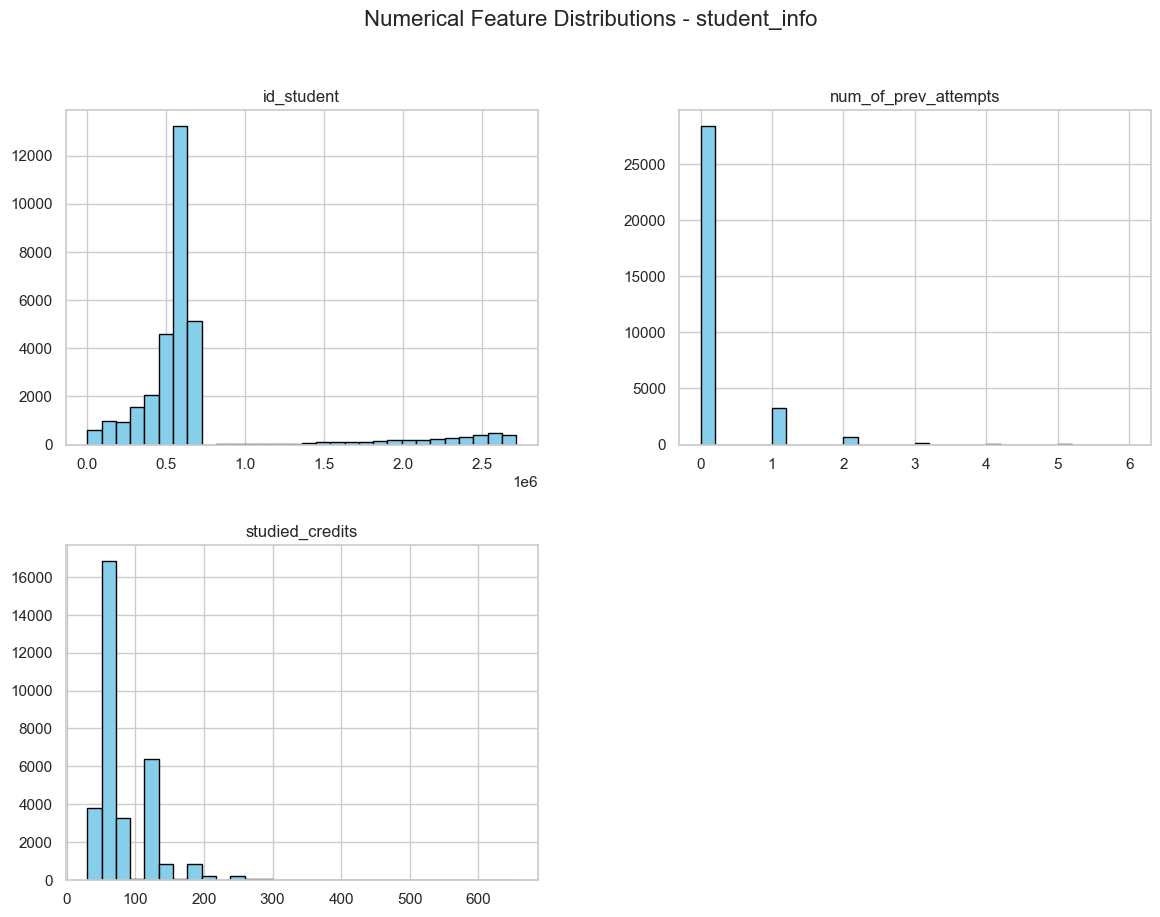

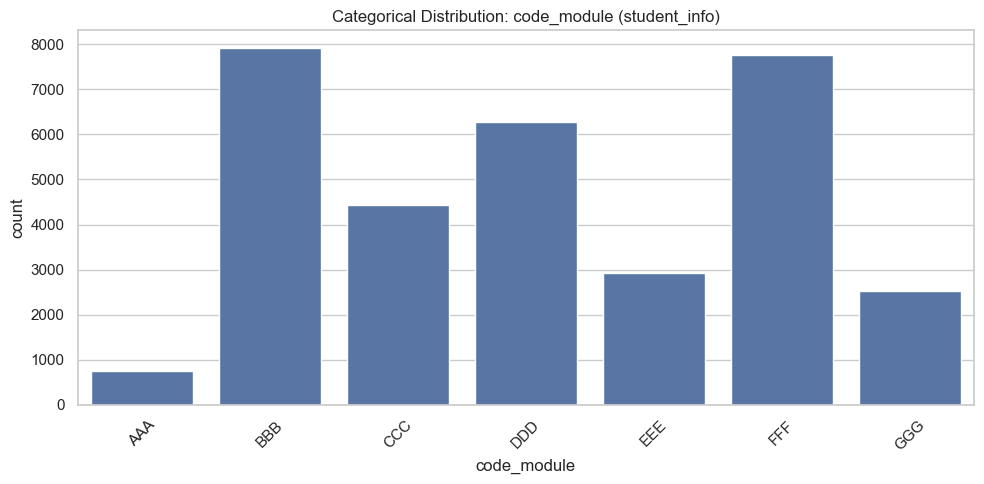

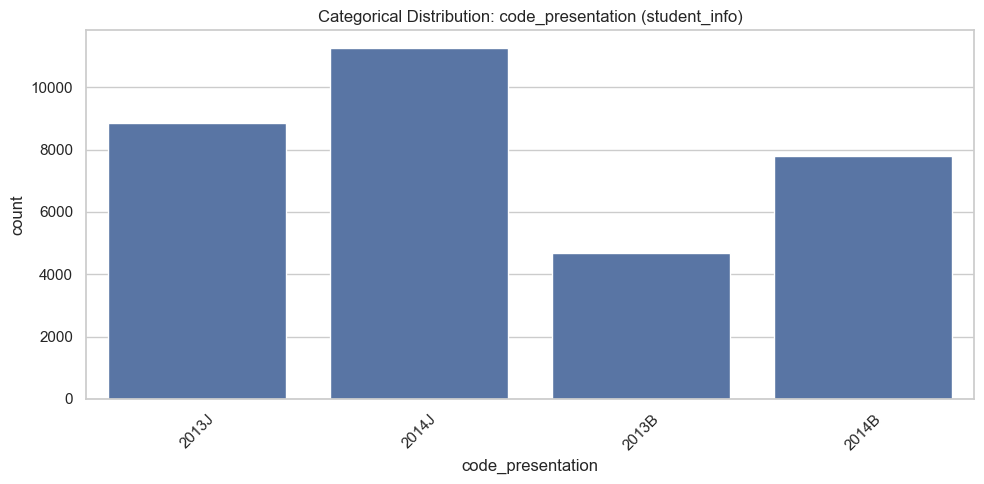

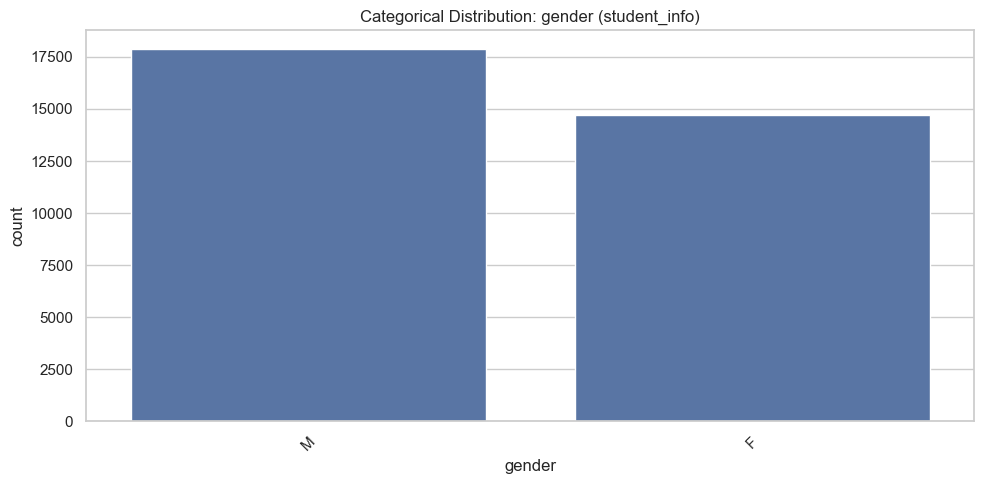

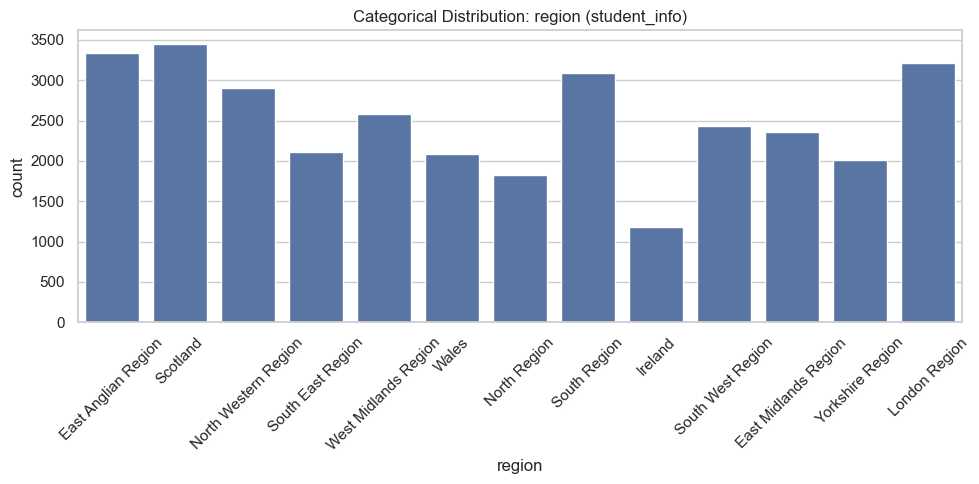

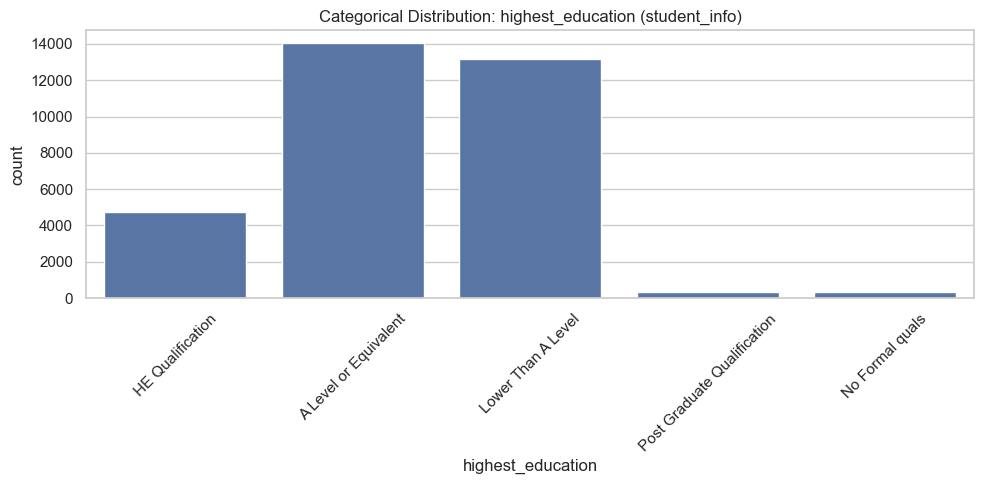

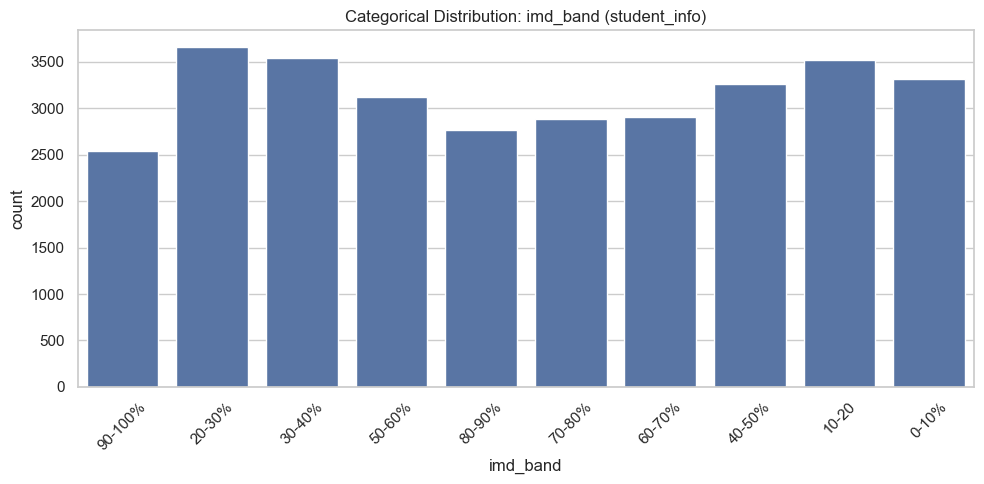

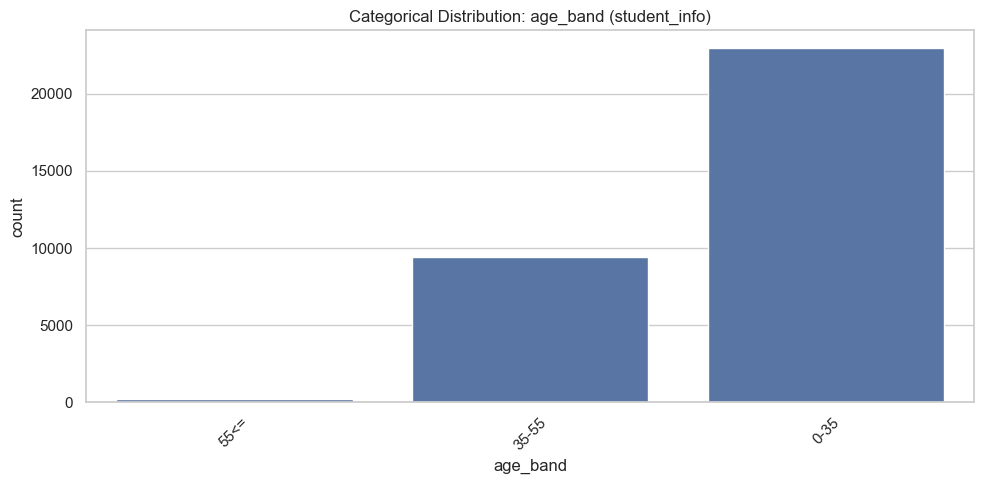

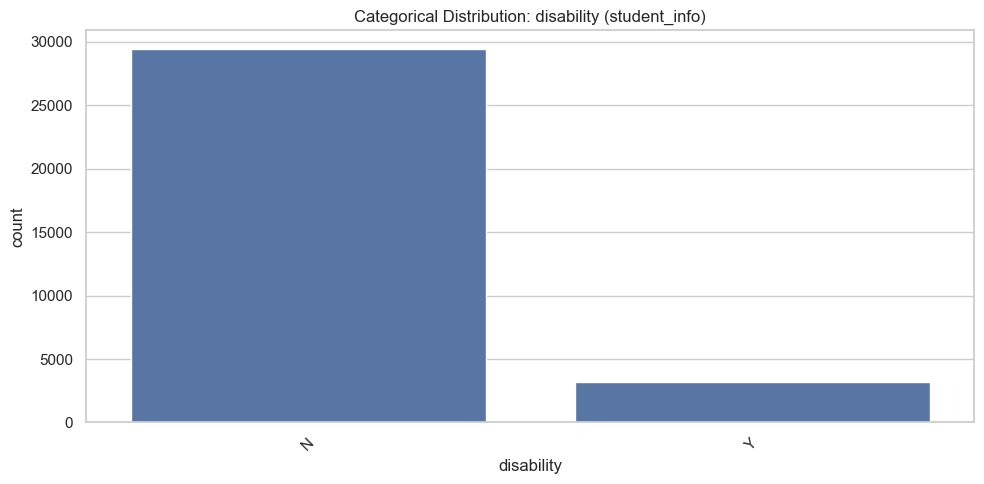

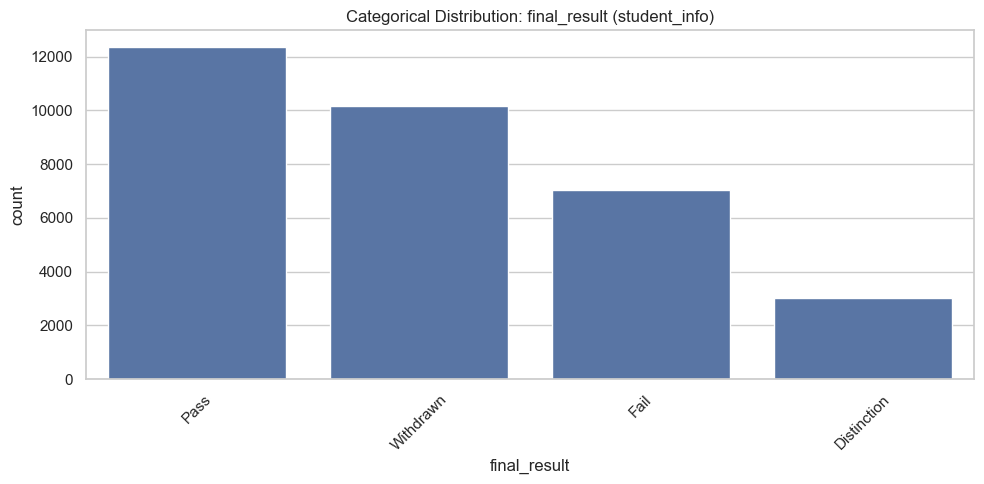

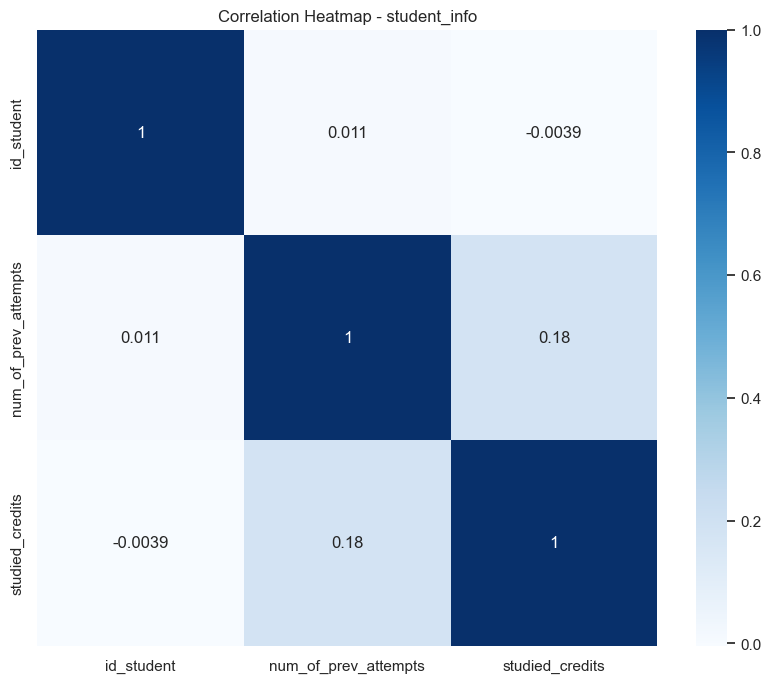


===== VISUALIZATION FOR: student_reg =====


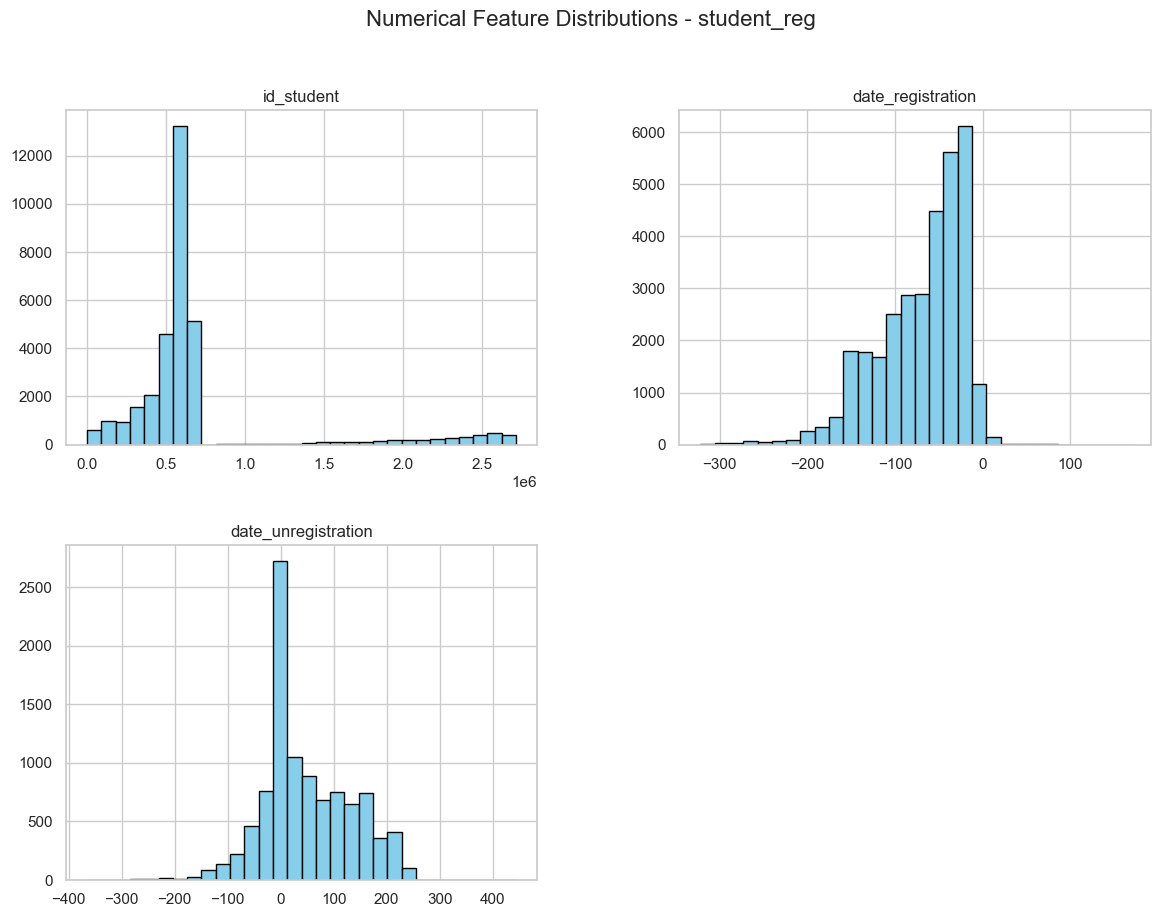

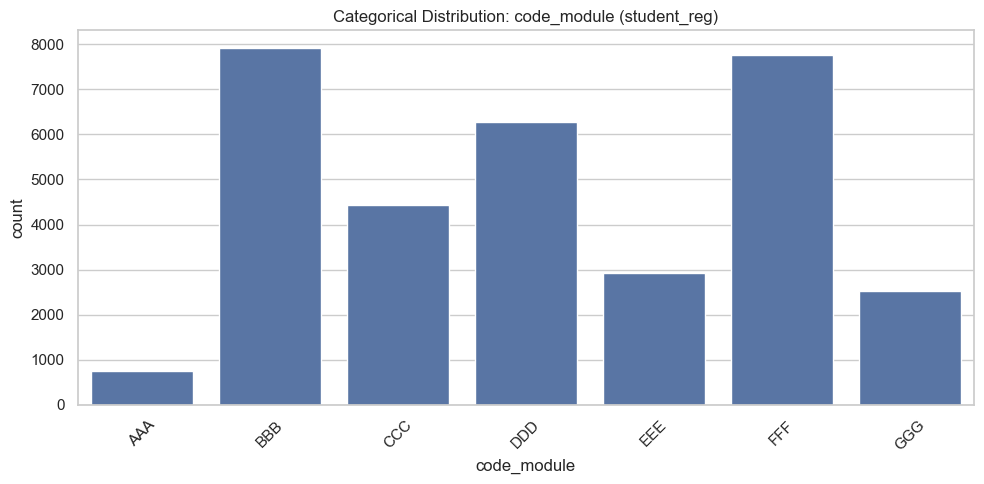

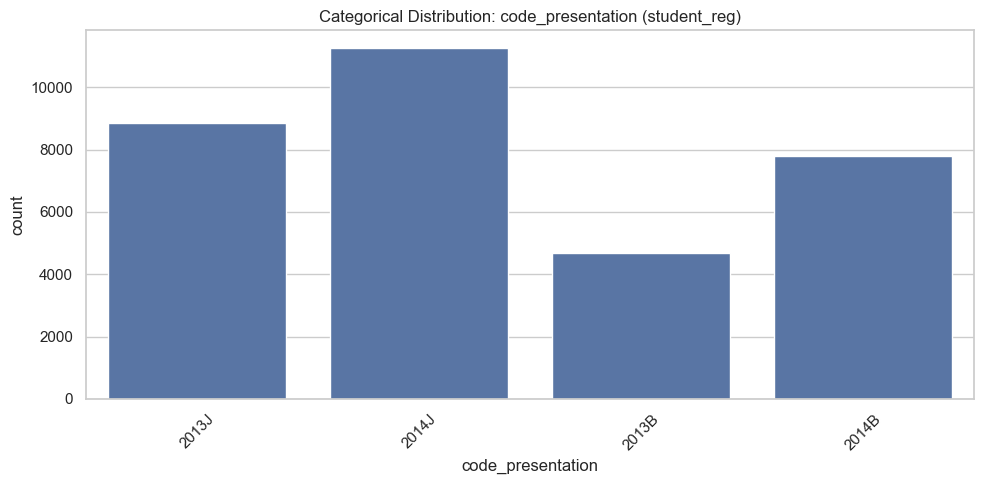

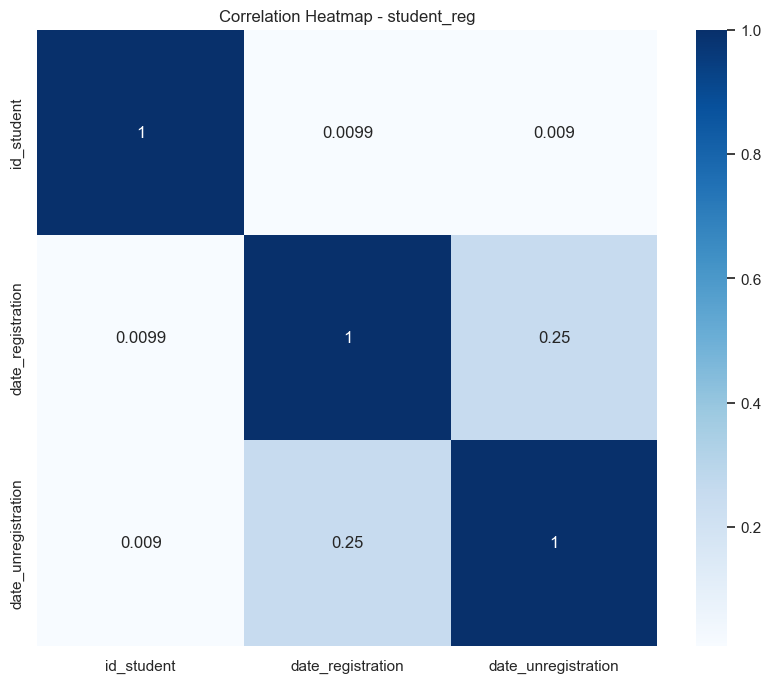


===== VISUALIZATION FOR: student_assess =====


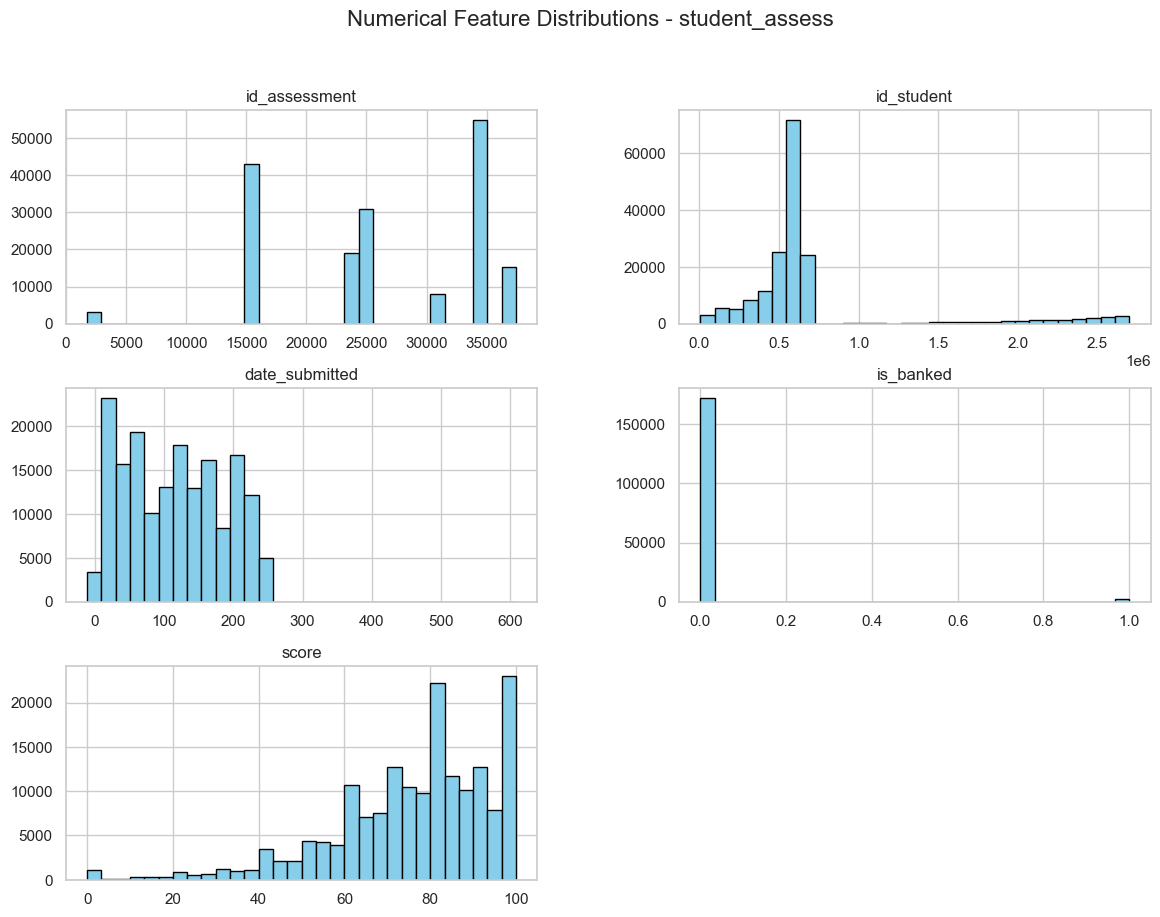

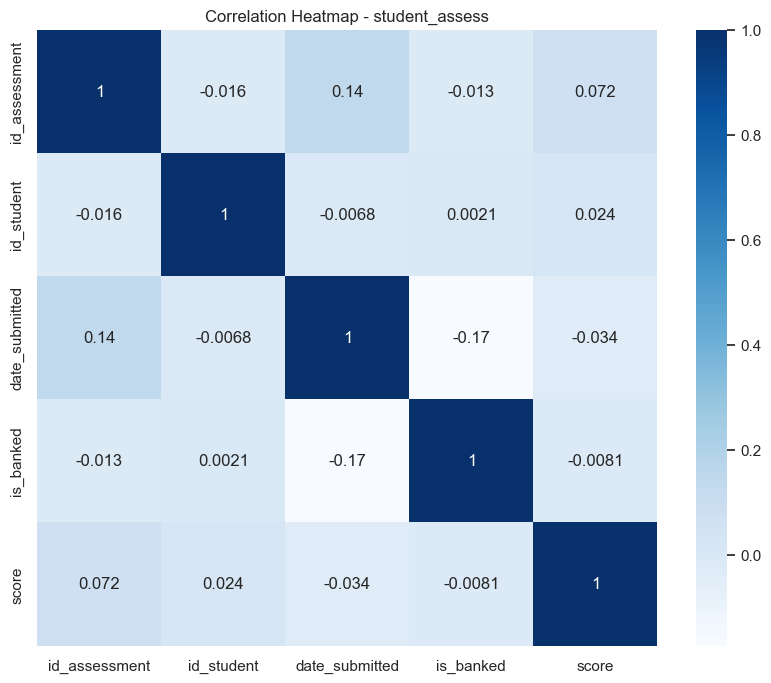


===== VISUALIZATION FOR: student_vle =====


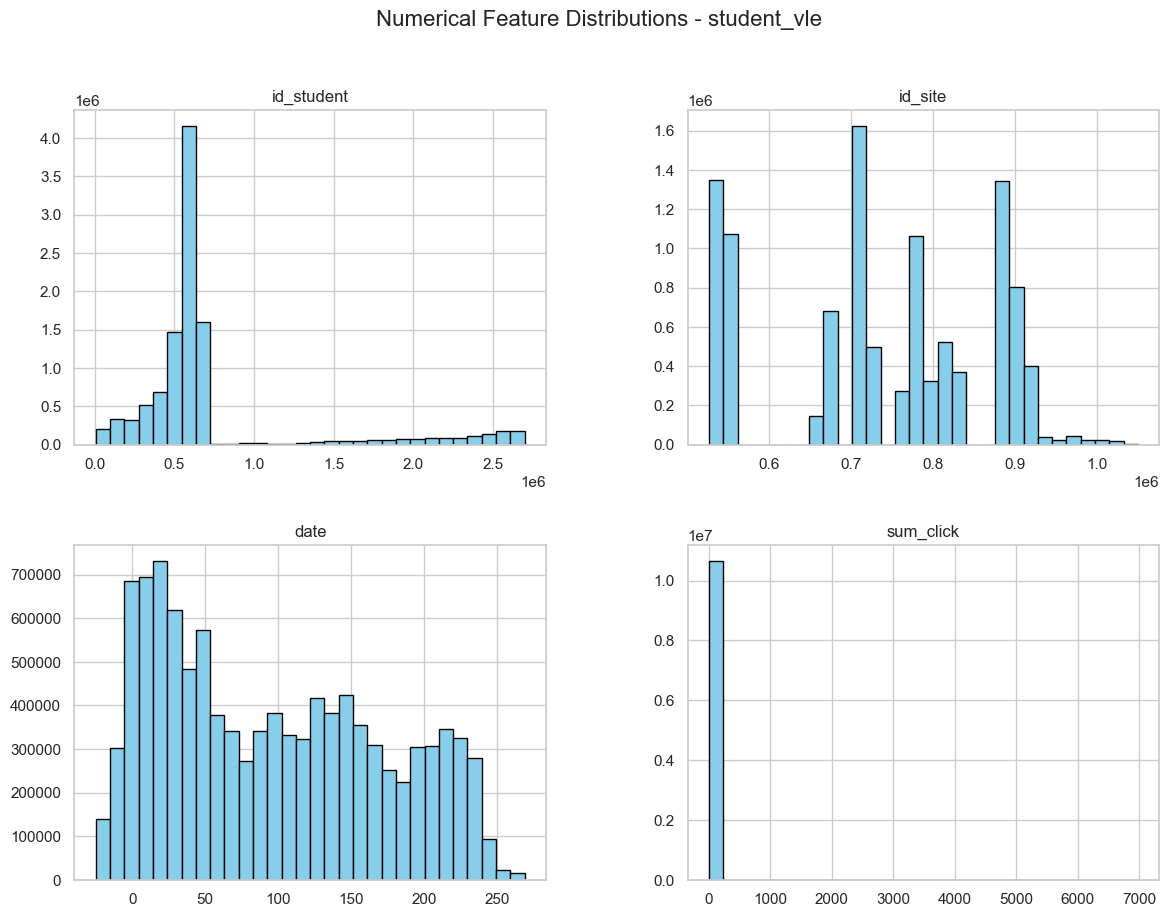

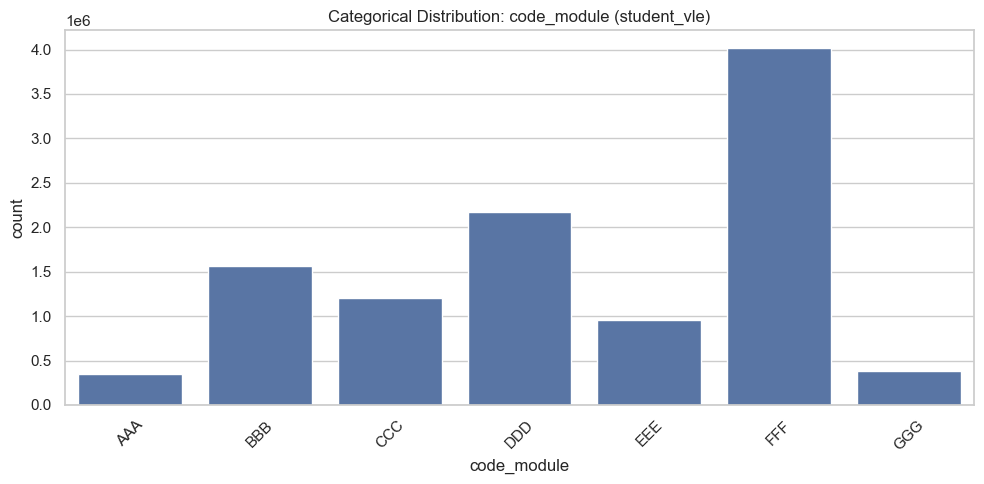

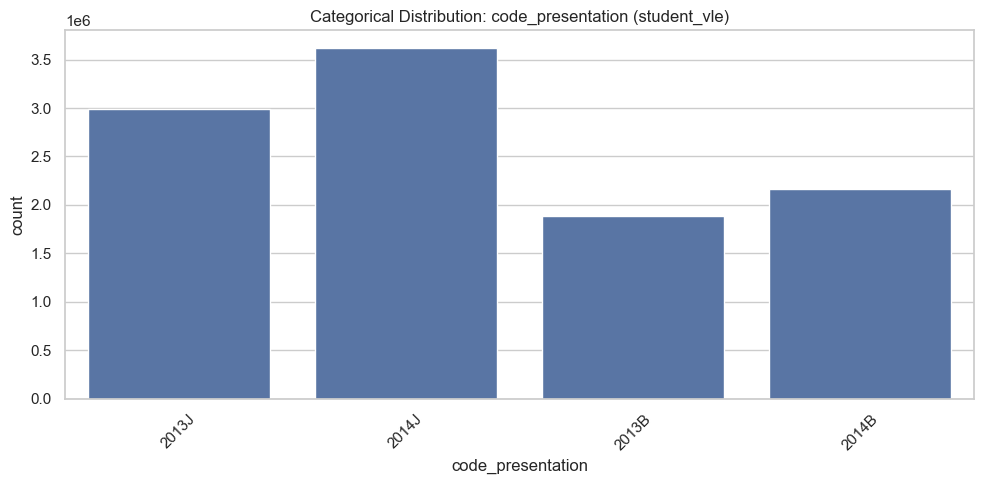

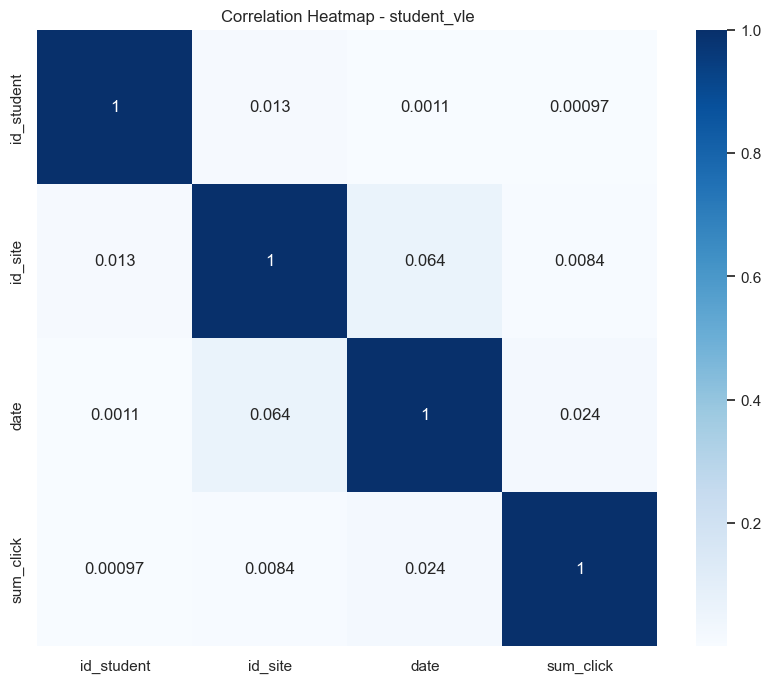


===== VISUALIZATION FOR: assessments =====


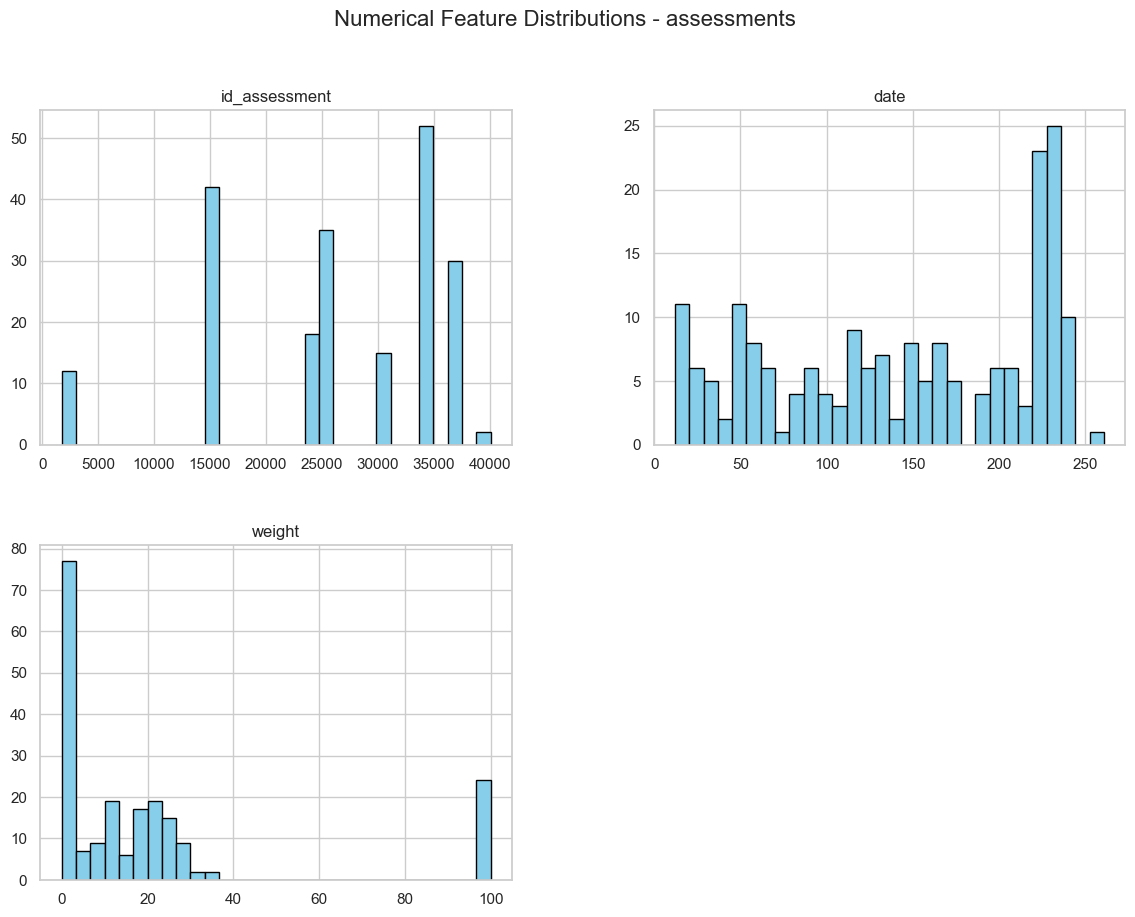

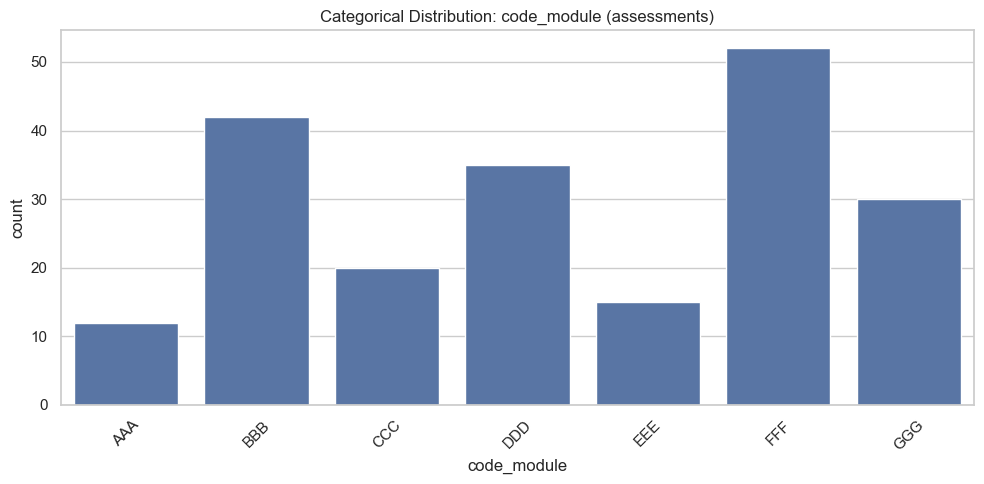

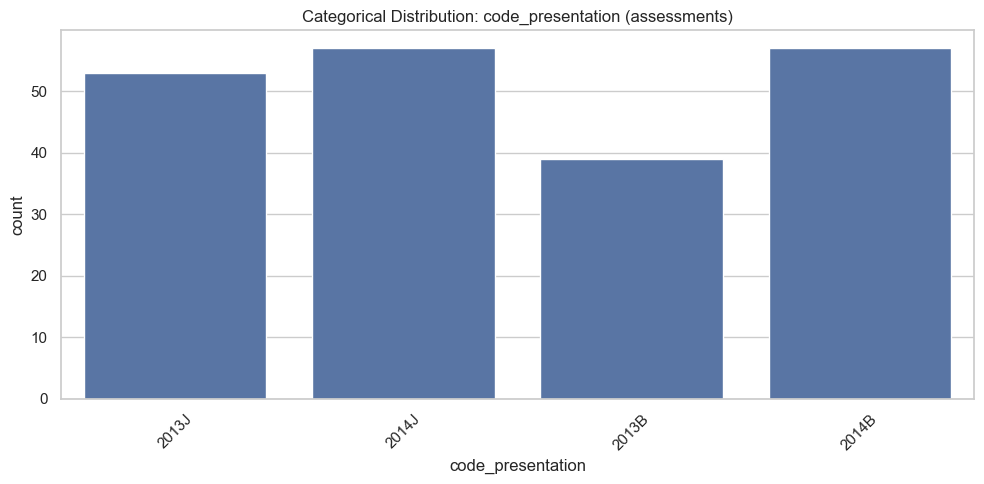

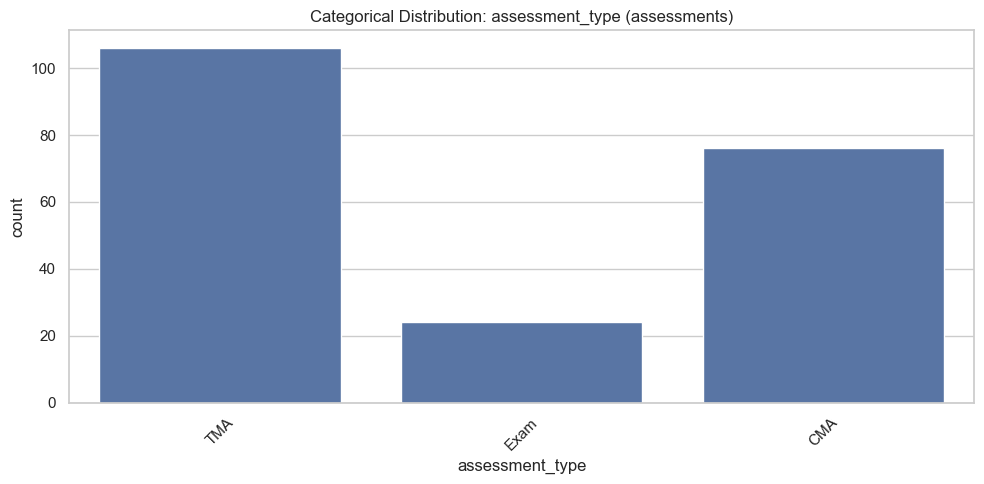

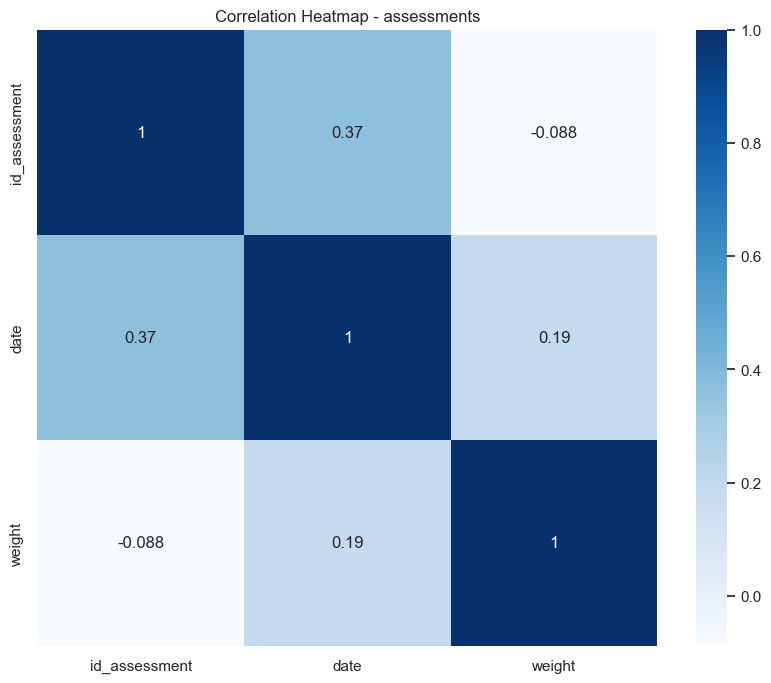


===== VISUALIZATION FOR: vle =====


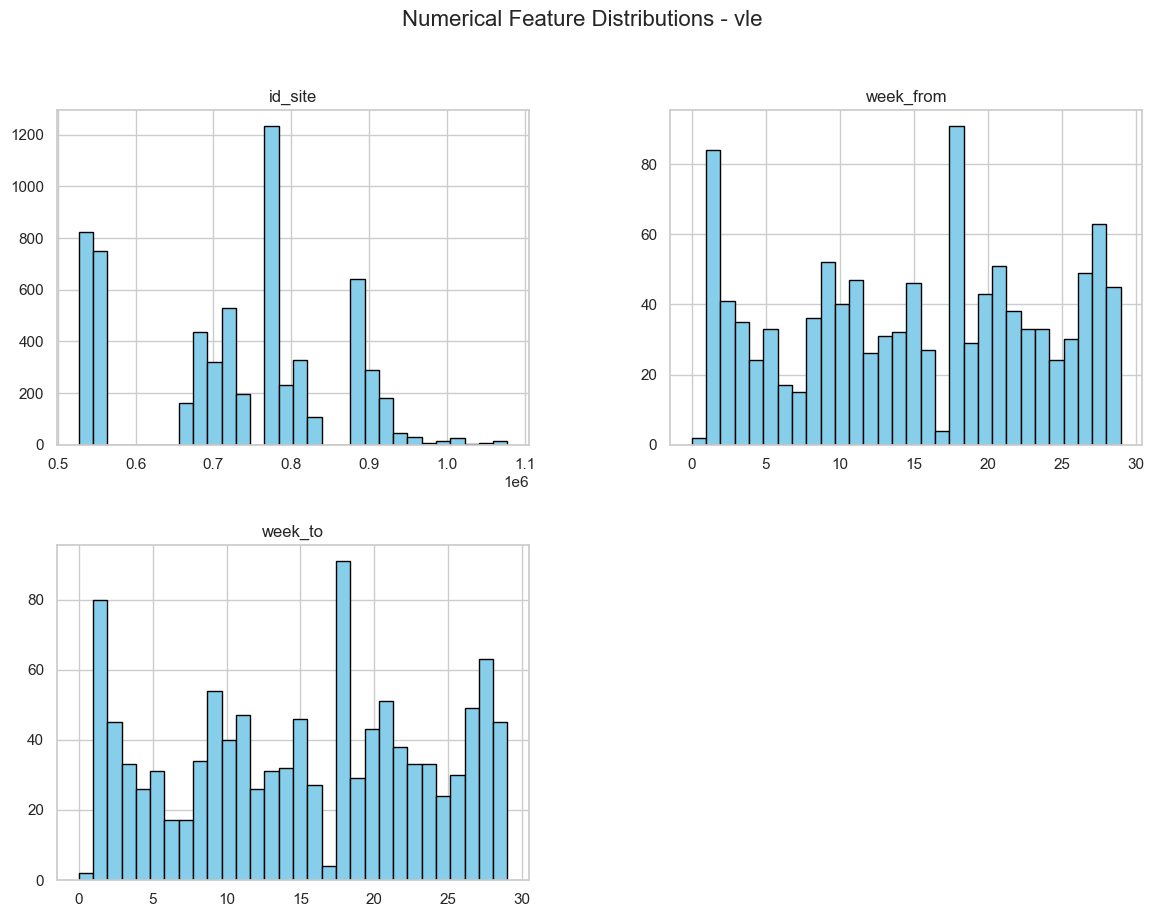

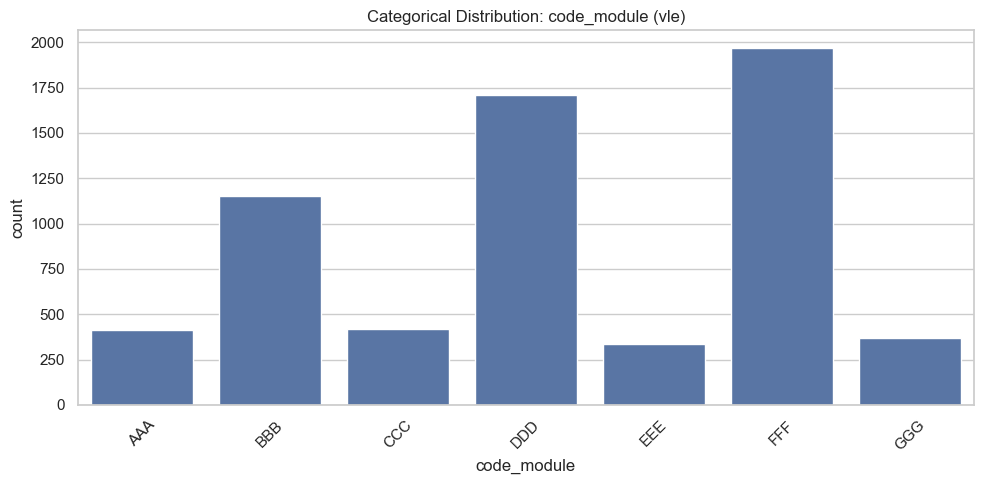

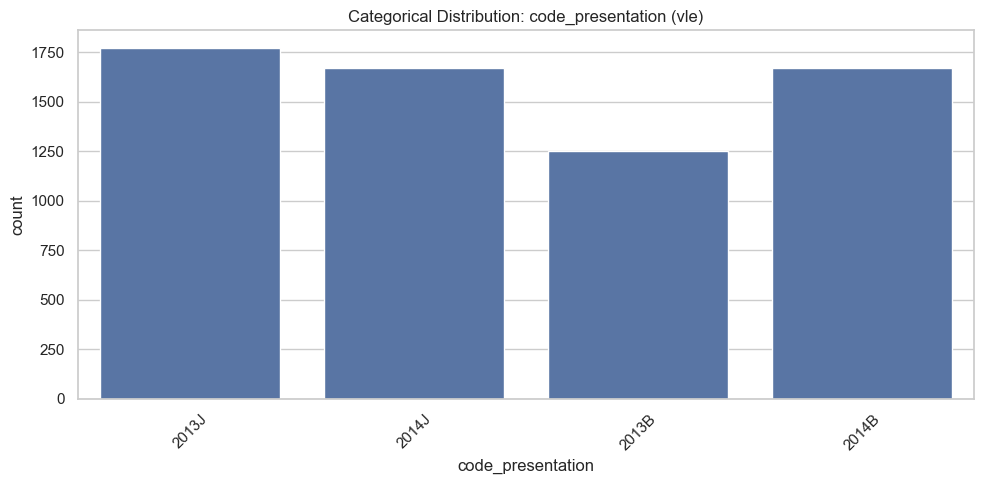

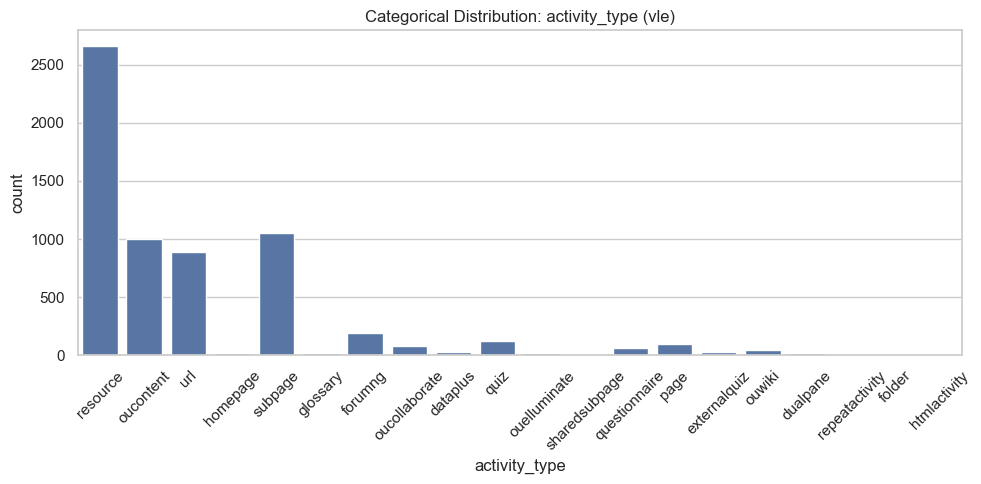

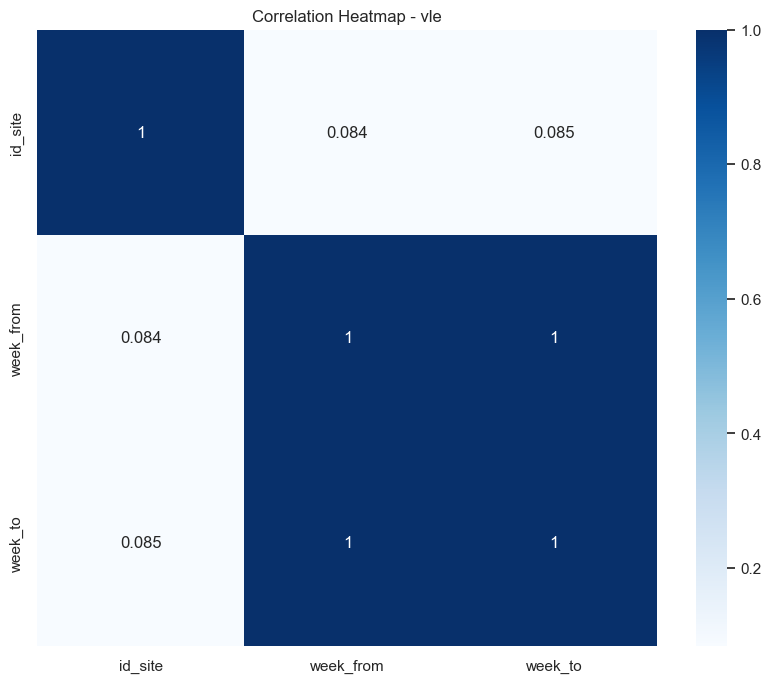


===== VISUALIZATION FOR: courses =====


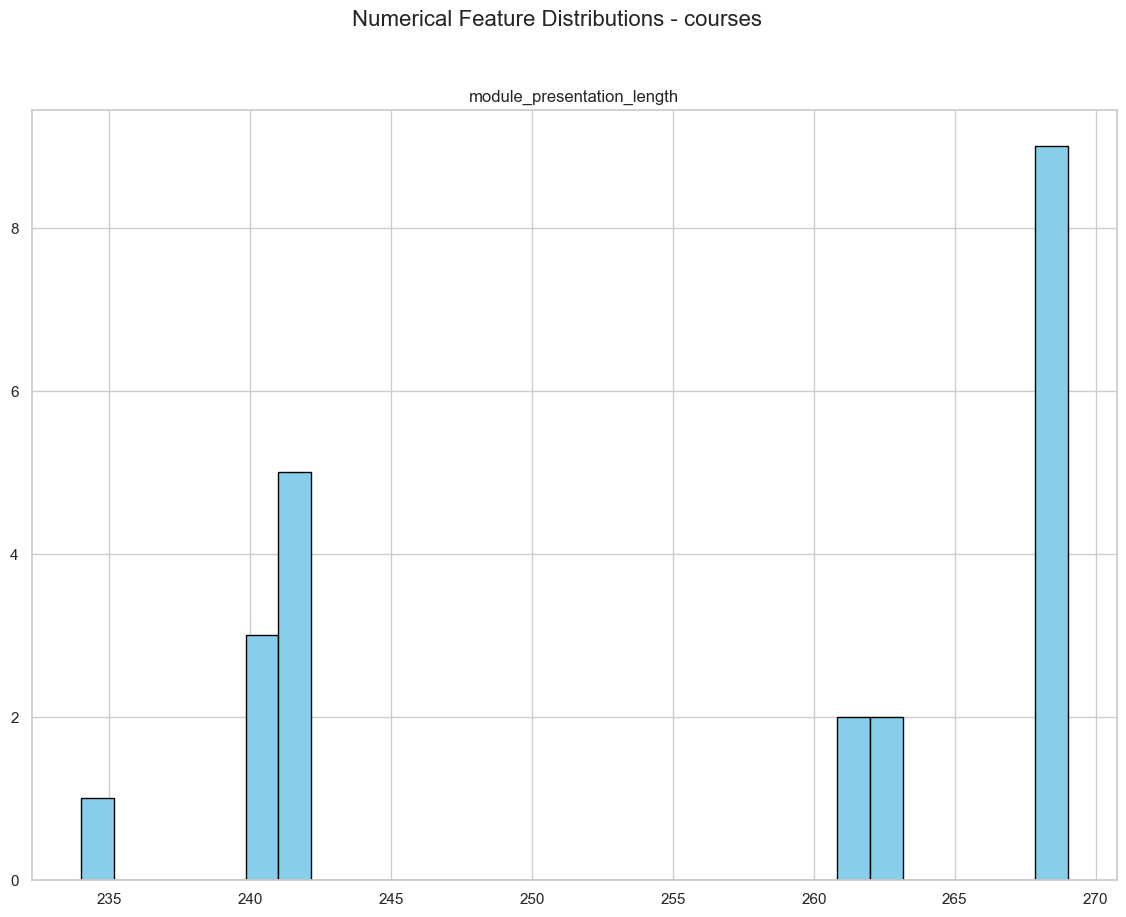

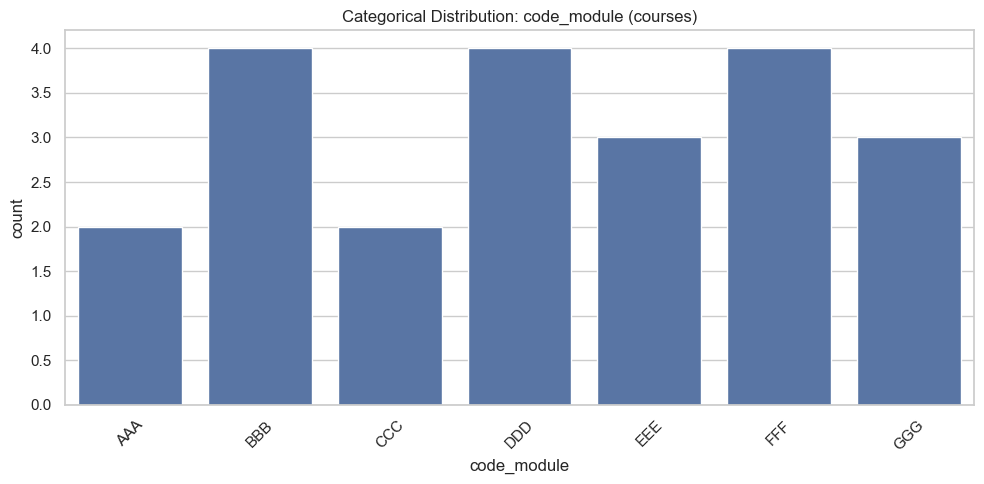

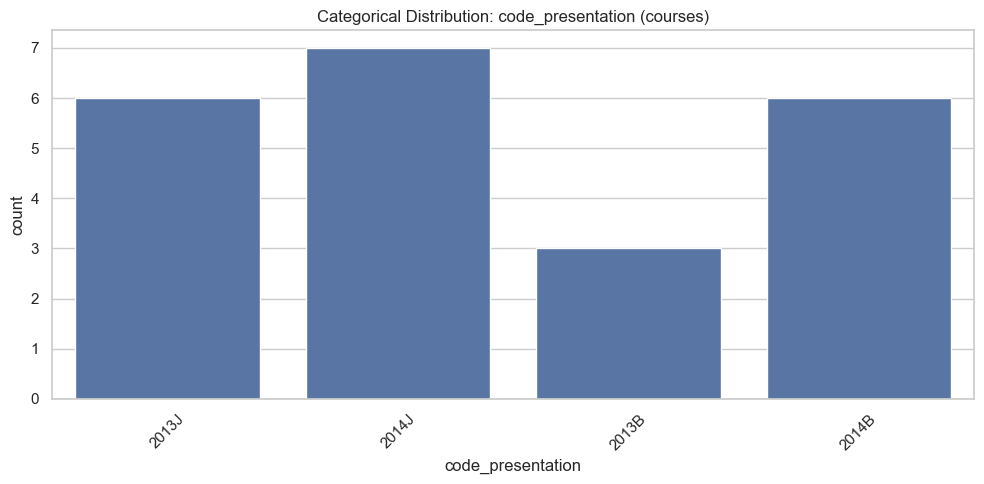

In [7]:
sns.set(style="whitegrid")

#  VISUALISASI DISTRIBUSI
for name, df in dfs.items():
    print(f"\n===== VISUALIZATION FOR: {name} =====")

    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    # DISTRIBUSI FITUR NUMERIK
    if len(numeric_cols) > 0:
        df[numeric_cols].hist(
            figsize=(14, 10),
            bins=30,
            edgecolor='black',
            color='skyblue'
        )
        plt.suptitle(f"Numerical Feature Distributions - {name}", fontsize=16)
        plt.show()

    # DISTRIBUSI FITUR KATEGORIKAL
    for col in cat_cols:
        plt.figure(figsize=(10,5))
        sns.countplot(data=df, x=col)
        plt.title(f"Categorical Distribution: {col} ({name})")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # CORRELATION HEATMAP
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10,8))
        sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Blues")
        plt.title(f"Correlation Heatmap - {name}")
        plt.show()

# **PRE PROCESSING**

In [9]:
# Manangani missing values
regions_list = student_info[student_info['imd_band'].isnull()]['region'].unique()

for region in regions_list:
  mode_imd_band = student_info[student_info['region'] == region]['imd_band'].mode()[0]
  student_info.loc[(student_info['imd_band'].isnull()) & (student_info['region'] == region), 'imd_band'] = mode_imd_band

student_reg['date_registration'] = student_reg['date_registration'].fillna(student_reg['date_registration'].median())

student_assess['score'] = student_assess['score'].fillna(0)

assessments['date'] = assessments['date'].fillna(assessments['date'].median())

vle['week_from'] = vle['week_from'].fillna(-1)

vle['week_to'] = vle['week_to'].fillna(-1)

In [10]:
# cek kembali missing values
for name, df in dfs.items():
    print(f"\nMissing values in {name}:")
    print(df.isna().sum())


Missing values in student_info:
code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

Missing values in student_reg:
code_module                0
code_presentation          0
id_student                 0
date_registration          0
date_unregistration    22521
dtype: int64

Missing values in student_assess:
id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

Missing values in student_vle:
code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

Missing values in assessments:
code_module          0
code_presentation    0
id_assessment        0
assessment_type     

In [11]:
# Merge student_info dengan student_reg
base_df = student_info.merge(
    student_reg,
    on=["code_module", "code_presentation", "id_student"],
    how="inner"
)

print("Shape setelah merge:", base_df.shape)
base_df.head()

Shape setelah merge: (32593, 14)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,12.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,NaN
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,NaN


In [12]:
print("Total student_info:", student_info["id_student"].nunique())
print("Total student_reg:", student_reg["id_student"].nunique())
print("Total setelah merge:", base_df["id_student"].nunique())

Total student_info: 28785
Total student_reg: 28785
Total setelah merge: 28785


In [13]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32593 non-null  object 
 1   code_presentation     32593 non-null  object 
 2   id_student            32593 non-null  int64  
 3   gender                32593 non-null  object 
 4   region                32593 non-null  object 
 5   highest_education     32593 non-null  object 
 6   imd_band              32593 non-null  object 
 7   age_band              32593 non-null  object 
 8   num_of_prev_attempts  32593 non-null  int64  
 9   studied_credits       32593 non-null  int64  
 10  disability            32593 non-null  object 
 11  final_result          32593 non-null  object 
 12  date_registration     32593 non-null  float64
 13  date_unregistration   10072 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 3.5+ MB


In [14]:
base_df.describe()

,id_student,num_of_prev_attempts,studied_credits,date_registration,date_unregistration
count,3.259300e+04,32593.000000,32593.000000,32593.000000,10072.000000
mean,7.066877e+05,0.163225,79.758691,-69.394164,49.757645
std,5.491673e+05,0.479758,41.071900,49.228660,82.460890
min,3.733000e+03,0.000000,30.000000,-322.000000,-365.000000
25%,5.085730e+05,0.000000,60.000000,-100.000000,-2.000000
50%,5.903100e+05,0.000000,60.000000,-57.000000,27.000000
75%,6.444530e+05,0.000000,120.000000,-29.000000,109.000000
max,2.716795e+06,6.000000,655.000000,167.000000,444.000000


In [15]:
base_df['id_student'].duplicated().sum()

np.int64(3808)

## **FEATURE ENGINEERING**

## **`Agregasi assessment per mahasiswa`**

In [16]:
assess_features = (
    student_assess
    .groupby("id_student")
    .agg(
        total_score=("score", "sum"),
        avg_score=("score", "mean"),
        num_assessments=("id_assessment", "count")
    )
    .reset_index()
)
assess_features.head(5)


,id_student,total_score,avg_score,num_assessments
0,6516,309.0,61.800000,5
1,8462,609.0,87.000000,7
2,11391,410.0,82.000000,5
3,23629,330.0,82.500000,4
4,23698,670.0,74.444444,9


## **`Agregasi VLE per mahasiswa (total clicks)`**

In [17]:
vle_features = (
    student_vle
    .groupby("id_student")
    .agg(total_clicks=("sum_click", "sum"))
    .reset_index()
)
vle_features.head(5)


,id_student,total_clicks
0,6516,2791
1,8462,656
2,11391,934
3,23629,161
4,23698,910


## **`First score per mahasiswa`**

In [18]:
first_score_features = (
    student_assess
    .merge(assessments[['id_assessment', 'date']], on='id_assessment', how='left')
    .sort_values(['id_student', 'date'])
    .groupby("id_student")
    .agg(first_score=("score", "first"))
    .reset_index()
)

first_score_features.head()


,id_student,first_score
0,6516,60.0
1,8462,93.0
2,11391,78.0
3,23629,67.0
4,23698,78.0


## **`Active days per mahasiswa`**

In [19]:
active_days_features = (
    student_vle
    .groupby("id_student")
    .agg(active_days=("date", "nunique"))
    .reset_index()
)
active_days_features.head(5)

,id_student,active_days
0,6516,159
1,8462,56
2,11391,40
3,23629,16
4,23698,70


## **`Learning duration (klik pertama - klik terakhir) per mahasiswa`**

In [20]:
learning_span_features = (
    student_vle
    .groupby("id_student")
    .agg(
        vle_first=("date", "min"),
        vle_last=("date", "max")
    )
    .reset_index()
)

learning_span_features["learning_span"] = (
    learning_span_features["vle_last"] - learning_span_features["vle_first"]
)

learning_span_features = learning_span_features[["id_student", "learning_span"]]
learning_span_features.head(5)


,id_student,learning_span
0,6516,292
1,8462,124
2,11391,258
3,23629,93
4,23698,249


## **`Late submission per mahasiswa`**

In [21]:
submissions = student_assess.merge(
    assessments[['id_assessment', 'date']],
    on='id_assessment',
    how='left'
)

submissions["is_late"] = submissions["date_submitted"] > submissions["date"]

late_submission_features = (
    submissions
    .groupby("id_student")
    .agg(
        late_submission_count=("is_late", "sum")
    )
    .reset_index()
)
late_submission_features.head()


,id_student,late_submission_count
0,6516,0
1,8462,1
2,11391,0
3,23629,3
4,23698,5


In [22]:
final_df = (
    base_df
    .merge(assess_features, on="id_student", how="left")
    .merge(first_score_features, on="id_student", how="left")
    .merge(active_days_features, on="id_student", how="left")
    .merge(vle_features, on="id_student", how="left")
    .merge(learning_span_features, on="id_student", how="left")
    .merge(late_submission_features, on="id_student", how="left")
)

final_df.shape

(32593, 22)

In [23]:
agg_features = [
    "total_score",
    "avg_score",
    "num_assessments",
    "total_clicks",
    "first_score",
    "active_days",
    "learning_span",
    "late_submission_count"
]

for col in agg_features:
    if col in final_df.columns:
        final_df[col] = final_df[col].fillna(0)
    else:
        final_df[col] = 0


In [24]:
summary_cols = [c for c in agg_features if c in final_df.columns]
display(final_df[summary_cols].head())


,total_score,avg_score,num_assessments,total_clicks,first_score,active_days,learning_span,late_submission_count
0,410.0,82.0,5.0,934.0,78.0,40.0,258.0,0.0
1,332.0,66.4,5.0,1435.0,70.0,80.0,249.0,2.0
2,0.0,0.0,0.0,281.0,0.0,12.0,22.0,0.0
3,380.0,76.0,5.0,2158.0,72.0,123.0,274.0,0.0
4,272.0,54.4,5.0,1034.0,69.0,70.0,257.0,5.0


In [25]:
final_df = final_df.drop_duplicates(subset=['id_student'], keep='first')

In [26]:
# Drop fitur yang menyebabkan leakage
cols_to_drop = ["id_student", "date_unregistration"]

for col in cols_to_drop:
    if col in final_df.columns:
        final_df = final_df.drop(columns=[col])

final_df.columns

Index(['code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'date_registration',
       'total_score', 'avg_score', 'num_assessments', 'first_score',
       'active_days', 'total_clicks', 'learning_span',
       'late_submission_count'],
      dtype='object')

In [27]:
X = final_df.drop("final_result", axis=1)
y = final_df["final_result"]

In [28]:
final_df.shape
final_df

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,total_score,avg_score,num_assessments,first_score,active_days,total_clicks,learning_span,late_submission_count
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,410.0,82.000000,5.0,78.0,40.0,934.0,258.0,0.0
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,332.0,66.400000,5.0,70.0,80.0,1435.0,249.0,2.0
2,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,-92.0,0.0,0.000000,0.0,0.0,12.0,281.0,22.0,0.0
3,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,-52.0,380.0,76.000000,5.0,72.0,123.0,2158.0,274.0,0.0
4,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,-176.0,272.0,54.400000,5.0,69.0,70.0,1034.0,257.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail,-4.0,0.0,0.000000,0.0,0.0,5.0,41.0,23.0,0.0
32589,GGG,2014J,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction,-23.0,793.0,88.111111,9.0,80.0,45.0,893.0,228.0,2.0
32590,GGG,2014J,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass,-129.0,690.0,76.666667,9.0,65.0,24.0,312.0,237.0,0.0
32591,GGG,2014J,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn,-49.0,183.0,91.500000,2.0,83.0,13.0,275.0,114.0,0.0


# **SKENARIO 1 (BASELINE)**

In [29]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()

print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")

Categorical columns: ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']
Numerical columns: ['num_of_prev_attempts', 'studied_credits', 'date_registration', 'total_score', 'avg_score', 'num_assessments', 'first_score', 'active_days', 'total_clicks', 'learning_span', 'late_submission_count']


In [30]:
# Label encode target
le = LabelEncoder()
y_encoded = le.fit_transform(final_df["final_result"])

print("Target classes:", dict(zip(le.classes_, le.transform(le.classes_))))

Target classes: {'Distinction': np.int64(0), 'Fail': np.int64(1), 'Pass': np.int64(2), 'Withdrawn': np.int64(3)}


In [31]:
# Split data sebelum preprocessing untuk menghindari data leakage
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Train size: {X_train_raw.shape}, Test size: {X_test_raw.shape}")

Train size: (23028, 19), Test size: (5757, 19)


In [32]:
X_train_enc = pd.get_dummies(X_train_raw, columns=cat_cols, drop_first=True)
X_test_enc = pd.get_dummies(X_test_raw, columns=cat_cols, drop_first=True)

# Pastikan kolom sama antara train dan test
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

# Scaling numerik - fit 
scaler = StandardScaler()
X_train_enc[num_cols] = scaler.fit_transform(X_train_enc[num_cols])
X_test_enc[num_cols] = scaler.transform(X_test_enc[num_cols])

# Clean column names untuk XGBoost
X_train = X_train_enc.copy()
X_test = X_test_enc.copy()
X_train.columns = [str(c).replace('[','(').replace(']',')').replace('<','lt_') for c in X_train.columns]
X_test.columns = [str(c).replace('[','(').replace(']',')').replace('<','lt_') for c in X_test.columns]

print(f"Final X_train shape: {X_train.shape}")
print(f"Final X_test shape: {X_test.shape}")

Final X_train shape: (23028, 49)
Final X_test shape: (5757, 49)


In [33]:
models_baseline = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

baseline_scores = {}

for name, model in models_baseline.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    baseline_scores[name] = acc

print("Baseline Scores:")
for name, score in baseline_scores.items():
    print(f"  {name}: {score:.4f}")

Baseline Scores:
  Logistic Regression: 0.7084
  Random Forest: 0.7252
  Decision Tree: 0.6295
  SVM: 0.7224
  XGBoost: 0.7264


In [34]:
for name, model in models_baseline.items():
    print("=" * 50)
    print(f"Model: {name}")
    print("=" * 50)
    y_pred = model.predict(X_test)

    y_true_labels = le.inverse_transform(y_test)
    y_pred_labels = le.inverse_transform(y_pred)

    print(classification_report(y_true_labels, y_pred_labels))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true_labels, y_pred_labels))

Model: Logistic Regression
              precision    recall  f1-score   support

 Distinction       0.64      0.45      0.53       529
        Fail       0.59      0.42      0.49      1253
        Pass       0.72      0.89      0.80      2167
   Withdrawn       0.76      0.77      0.76      1808

    accuracy                           0.71      5757
   macro avg       0.68      0.63      0.64      5757
weighted avg       0.70      0.71      0.69      5757

Confusion Matrix:
[[ 236    3  287    3]
 [   4  525  300  424]
 [ 114  106 1928   19]
 [  16  256  147 1389]]
Model: Random Forest
              precision    recall  f1-score   support

 Distinction       0.68      0.47      0.56       529
        Fail       0.59      0.44      0.50      1253
        Pass       0.75      0.91      0.83      2167
   Withdrawn       0.76      0.77      0.77      1808

    accuracy                           0.73      5757
   macro avg       0.70      0.65      0.66      5757
weighted avg       0.71   

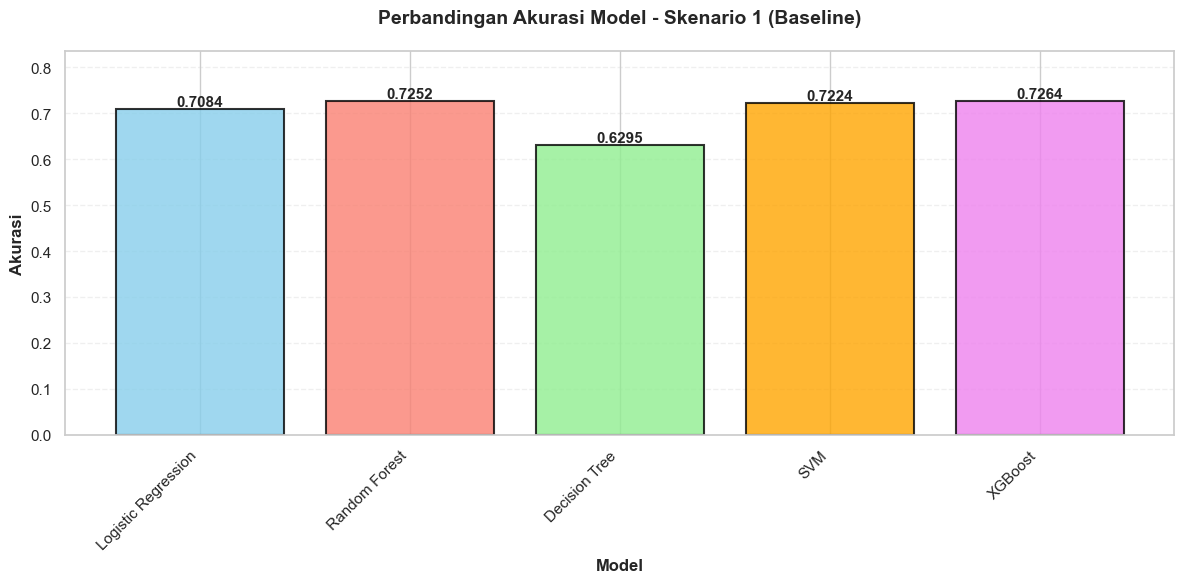


Skenario 1 (Baseline)
Model Terbaik: XGBoost
Akurasi Tertinggi: 0.7264
Akurasi Terendah: 0.6295
Rata-rata Akurasi: 0.7024


In [35]:
plt.figure(figsize=(12, 6))

models_list = list(baseline_scores.keys())
scores_list = list(baseline_scores.values())

bars = plt.bar(models_list, scores_list, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'violet'], 
               edgecolor='black', linewidth=1.5, alpha=0.8)


for bar, score in zip(bars, scores_list):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{score:.4f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Perbandingan Akurasi Model - Skenario 1 (Baseline)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Akurasi', fontsize=12, fontweight='bold')
plt.ylim(0, max(scores_list) * 1.15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nSkenario 1 (Baseline)")
print(f"Model Terbaik: {max(baseline_scores, key=baseline_scores.get)}")
print(f"Akurasi Tertinggi: {max(baseline_scores.values()):.4f}")
print(f"Akurasi Terendah: {min(baseline_scores.values()):.4f}")
print(f"Rata-rata Akurasi: {sum(baseline_scores.values())/len(baseline_scores):.4f}")

# **SKENARIO 2: SMOTE**

In [36]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", pd.Series(y_train).value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_res).value_counts().to_dict())

Before SMOTE: {2: 8666, 3: 7235, 1: 5011, 0: 2116}
After SMOTE: {3: 8666, 2: 8666, 1: 8666, 0: 8666}


In [37]:
models_smote = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(
        objective='multi:softprob',
        num_class=len(np.unique(y)),
        eval_metric='mlogloss',
        tree_method='hist'
    )
}

In [38]:
results_smote = {}

for name, model in models_smote.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results_smote[name] = acc

    print("="*55)
    print(f"Model: {name} (SMOTE)")
    print(f"Accuracy: {acc:.4f}")
    print("\nReport:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

Model: Logistic Regression (SMOTE)
Accuracy: 0.6844

Report:
              precision    recall  f1-score   support

           0       0.49      0.65      0.56       529
           1       0.54      0.48      0.51      1253
           2       0.75      0.77      0.76      2167
           3       0.77      0.73      0.75      1808

    accuracy                           0.68      5757
   macro avg       0.64      0.66      0.65      5757
weighted avg       0.69      0.68      0.68      5757

Confusion Matrix:
[[ 345    1  182    1]
 [  19  604  251  379]
 [ 308  176 1665   18]
 [  26  335  121 1326]]
Model: Random Forest (SMOTE)
Accuracy: 0.7122

Report:
              precision    recall  f1-score   support

           0       0.54      0.70      0.61       529
           1       0.57      0.53      0.55      1253
           2       0.78      0.81      0.80      2167
           3       0.79      0.73      0.76      1808

    accuracy                           0.71      5757
   macro avg

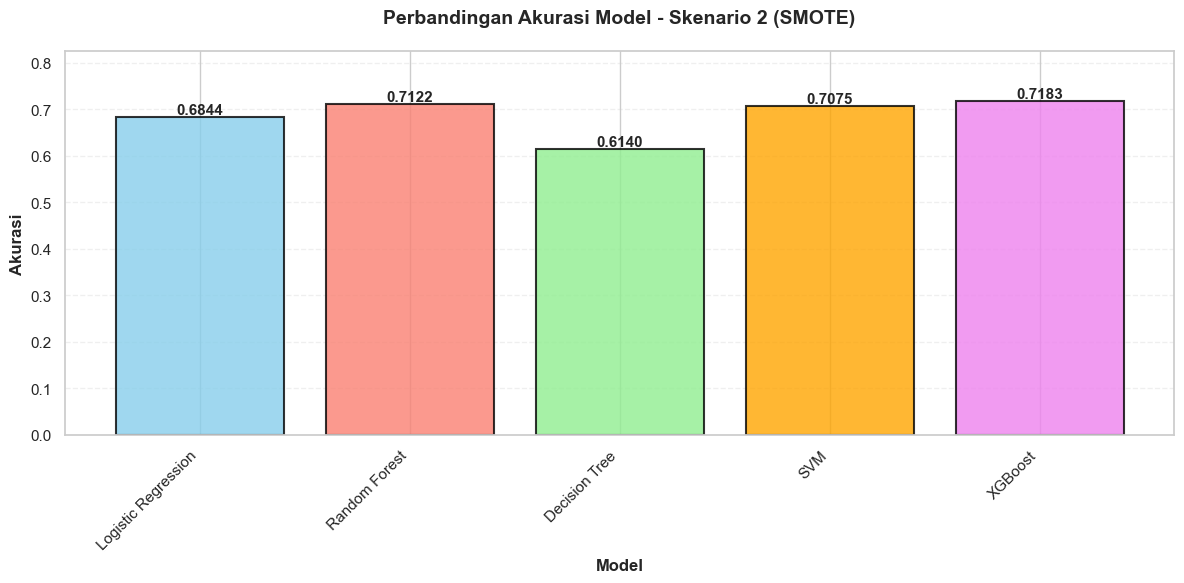


Skenario 2 (SMOTE)
Model Terbaik: XGBoost
Akurasi Tertinggi: 0.7183
Akurasi Terendah: 0.6140
Rata-rata Akurasi: 0.6873


In [39]:
# Visualisasi Barplot untuk Skenario 2 (SMOTE)
plt.figure(figsize=(12, 6))

models_list_smote = list(results_smote.keys())
scores_list_smote = list(results_smote.values())

# Buat barplot
bars = plt.bar(models_list_smote, scores_list_smote, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'violet'], 
               edgecolor='black', linewidth=1.5, alpha=0.8)

for bar, score in zip(bars, scores_list_smote):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{score:.4f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Perbandingan Akurasi Model - Skenario 2 (SMOTE)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Akurasi', fontsize=12, fontweight='bold')
plt.ylim(0, max(scores_list_smote) * 1.15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nSkenario 2 (SMOTE)")
print(f"Model Terbaik: {max(results_smote, key=results_smote.get)}")
print(f"Akurasi Tertinggi: {max(results_smote.values()):.4f}")
print(f"Akurasi Terendah: {min(results_smote.values()):.4f}")
print(f"Rata-rata Akurasi: {sum(results_smote.values())/len(results_smote):.4f}")

# **SKENARIO 3: FEATURE SELECTION**

In [40]:
X_MI_raw = final_df.drop(columns=["final_result"]).copy()
y_MI_raw = final_df["final_result"].copy()

# Label encode y (Target)
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y_MI_raw)

In [41]:
X_encoded_for_MI = X_MI_raw.copy()
for col in cat_cols:
    encoder = LabelEncoder()
    # Pastikan data kategorikal diubah ke string untuk LabelEncoder 
    X_encoded_for_MI[col] = encoder.fit_transform(X_encoded_for_MI[col].astype(str))

imputer = SimpleImputer(strategy="most_frequent")
X_imputed_for_MI = pd.DataFrame(
    imputer.fit_transform(X_encoded_for_MI),
    columns=X_encoded_for_MI.columns
)

In [42]:
mi_scores = mutual_info_classif(X_imputed_for_MI, y_encoded, random_state=42)

mi_df = pd.DataFrame({
    "feature": X_imputed_for_MI.columns,
    "mi_score": mi_scores
}).sort_values(by="mi_score", ascending=False)

mi_df

,feature,mi_score
17,learning_span,0.400482
11,total_score,0.394488
12,avg_score,0.392554
13,num_assessments,0.370136
15,active_days,0.261989
16,total_clicks,0.236275
14,first_score,0.225610
18,late_submission_count,0.073362
0,code_module,0.031083
8,studied_credits,0.020236


In [43]:
top_k = 17
selected_features = mi_df["feature"].head(top_k).tolist()

print("=== Selected Features (Top 13) ===")
print(mi_df.head(top_k))

=== Selected Features (Top 13) ===
                  feature  mi_score
17          learning_span  0.400482
11            total_score  0.394488
12              avg_score  0.392554
13        num_assessments  0.370136
15            active_days  0.261989
16           total_clicks  0.236275
14            first_score  0.225610
18  late_submission_count  0.073362
0             code_module  0.031083
8         studied_credits  0.020236
5                imd_band  0.014502
10      date_registration  0.013453
4       highest_education  0.009915
7    num_of_prev_attempts  0.008924
3                  region  0.007020
6                age_band  0.005137
1       code_presentation  0.004921


In [44]:
# Filter data asli berdasarkan fitur terpilih
X_filtered = X_MI_raw[selected_features]

# Split data (menggunakan target numerik y_encoded untuk stratify)
X_train_MI, X_test_MI, y_train_MI_enc, y_test_MI_enc = train_test_split(
    X_filtered, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Kategorisasi fitur terpilih
num_MI = [col for col in selected_features if col in num_cols]
cat_MI = [col for col in selected_features if col in cat_cols]

In [45]:
preprocessor_MI = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_MI),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_MI),
    ],
    remainder='passthrough'
)

# X_train_MI_pre adalah array NUMERIK
X_train_MI_pre = preprocessor_MI.fit_transform(X_train_MI)
X_test_MI_pre = preprocessor_MI.transform(X_test_MI)

In [46]:
models_MI = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True),

    "XGBoost": XGBClassifier(
        objective='multi:softprob',
        num_class=len(le_target.classes_), # Menggunakan jumlah kelas dari LabelEncoder
        eval_metric='mlogloss',
        tree_method='hist'
    )
}

results_MI = {}

In [47]:
for name, model in models_MI.items():
    print(f"\nModel: {name}")
    
    model.fit(X_train_MI_pre, y_train_MI_enc) 

    y_pred = model.predict(X_test_MI_pre)
    acc = accuracy_score(y_test_MI_enc, y_pred)
    results_MI[name] = acc
    
    # Konversi hasil prediksi dan testing ke label asli untuk Classification Report
    y_test_labels = le_target.inverse_transform(y_test_MI_enc)
    y_pred_labels = le_target.inverse_transform(y_pred)

    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test_labels, y_pred_labels))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test_labels, y_pred_labels))


Model: Logistic Regression
Accuracy: 0.7080

Classification Report:
              precision    recall  f1-score   support

 Distinction       0.63      0.44      0.52       529
        Fail       0.59      0.42      0.49      1253
        Pass       0.72      0.89      0.80      2167
   Withdrawn       0.75      0.77      0.76      1808

    accuracy                           0.71      5757
   macro avg       0.68      0.63      0.64      5757
weighted avg       0.70      0.71      0.69      5757


Confusion Matrix:
[[ 233    3  289    4]
 [   4  522  298  429]
 [ 114  106 1927   20]
 [  17  248  149 1394]]

Model: Random Forest
Accuracy: 0.7247

Classification Report:
              precision    recall  f1-score   support

 Distinction       0.70      0.46      0.56       529
        Fail       0.59      0.42      0.49      1253
        Pass       0.75      0.92      0.83      2167
   Withdrawn       0.76      0.78      0.77      1808

    accuracy                           0.72      

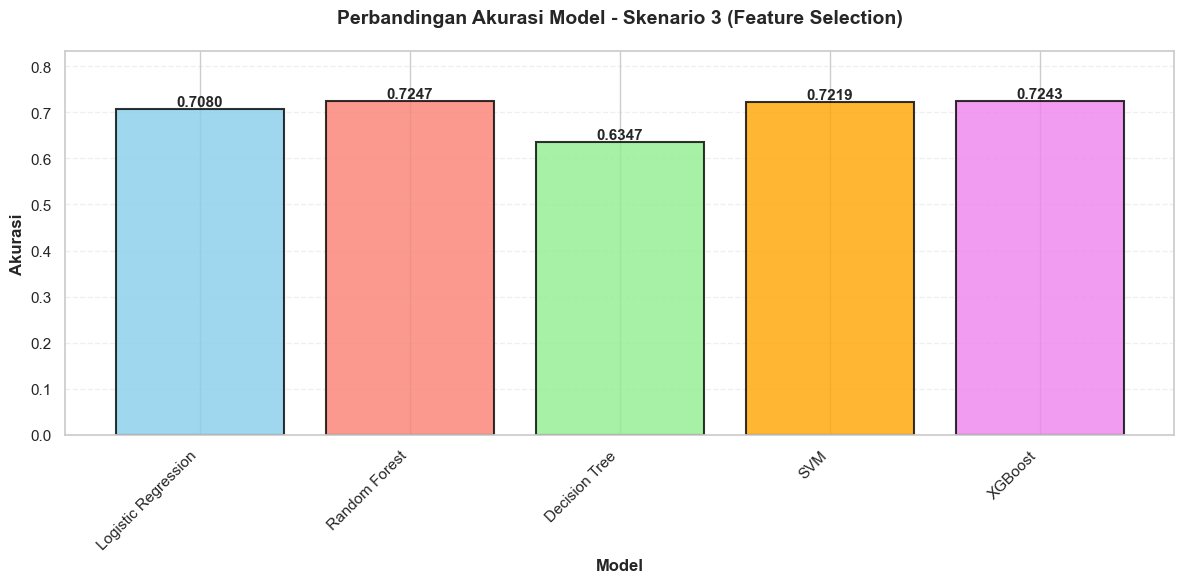


Jumlah Fitur yang Dipilih: 17 dari 19
Reduksi Fitur: 10.53%

Skenario 3 (Feature Selection)
Model Terbaik: Random Forest
Akurasi Tertinggi: 0.7247
Akurasi Terendah: 0.6347
Rata-rata Akurasi: 0.7027


In [48]:
plt.figure(figsize=(12, 6))

models_list_fs = list(results_MI.keys())
scores_list_fs = list(results_MI.values())

# Buat barplot
bars = plt.bar(models_list_fs, scores_list_fs, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'violet'], 
               edgecolor='black', linewidth=1.5, alpha=0.8)

# Tambahkan nilai akurasi di atas setiap bar
for bar, score in zip(bars, scores_list_fs):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{score:.4f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Perbandingan Akurasi Model - Skenario 3 (Feature Selection)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Akurasi', fontsize=12, fontweight='bold')
plt.ylim(0, max(scores_list_fs) * 1.15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nJumlah Fitur yang Dipilih: {len(selected_features)} dari {X_MI_raw.shape[1]}")
print(f"Reduksi Fitur: {(1 - len(selected_features)/X_MI_raw.shape[1]) * 100:.2f}%")

print("\nSkenario 3 (Feature Selection)")
print(f"Model Terbaik: {max(results_MI, key=results_MI.get)}")
print(f"Akurasi Tertinggi: {max(results_MI.values()):.4f}")
print(f"Akurasi Terendah: {min(results_MI.values()):.4f}")
print(f"Rata-rata Akurasi: {sum(results_MI.values())/len(results_MI):.4f}")

# **SKENARIO 4: FEATURE SELECTION + SMOTE**

In [49]:
sm = SMOTE(random_state=42)
X_train_MI_res, y_train_MI_res = sm.fit_resample(X_train_MI_pre, y_train_MI_enc)

print("\nSMOTE Selected Features")
print("Before SMOTE:", pd.Series(y_train_MI_enc).value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_MI_res).value_counts().to_dict())


SMOTE Selected Features
Before SMOTE: {2: 8666, 3: 7235, 1: 5011, 0: 2116}
After SMOTE: {3: 8666, 2: 8666, 1: 8666, 0: 8666}


In [50]:
models_MI_SMOTE = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(
        objective='multi:softprob',
        num_class=len(np.unique(y_train_MI_res)),
        eval_metric='mlogloss',
        tree_method='hist'
    )
}

results_MI_SMOTE = {}

In [51]:
for name, model in models_MI_SMOTE.items():
    print("="*60)
    print(f"Model: {name} (MI Selected Features + SMOTE)")
    
    # Pelatihan dengan data hasil SMOTE
    model.fit(X_train_MI_res, y_train_MI_res) 

    # Prediksi dengan data test yang sudah diproses fiturnya
    y_pred = model.predict(X_test_MI_pre)
    
    acc = accuracy_score(y_test_MI_enc, y_pred)
    results_MI_SMOTE[name] = acc

    # Inverse transform untuk
    y_test_labels = le_target.inverse_transform(y_test_MI_enc)
    y_pred_labels = le_target.inverse_transform(y_pred)

    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report (Inverse Labels):")
    print(classification_report(y_test_labels, y_pred_labels))
    print("\nConfusion Matrix (Inverse Labels):")
    print(confusion_matrix(y_test_labels, y_pred_labels))

Model: Logistic Regression (MI Selected Features + SMOTE)
Accuracy: 0.6661

Classification Report (Inverse Labels):
              precision    recall  f1-score   support

 Distinction       0.45      0.82      0.58       529
        Fail       0.52      0.54      0.53      1253
        Pass       0.78      0.67      0.72      2167
   Withdrawn       0.79      0.70      0.74      1808

    accuracy                           0.67      5757
   macro avg       0.63      0.68      0.64      5757
weighted avg       0.70      0.67      0.67      5757


Confusion Matrix (Inverse Labels):
[[ 434    5   89    1]
 [  31  681  220  321]
 [ 462  225 1462   18]
 [  46  406   98 1258]]
Model: Random Forest (MI Selected Features + SMOTE)
Accuracy: 0.7104

Classification Report (Inverse Labels):
              precision    recall  f1-score   support

 Distinction       0.55      0.64      0.59       529
        Fail       0.57      0.49      0.53      1253
        Pass       0.77      0.83      0.80    

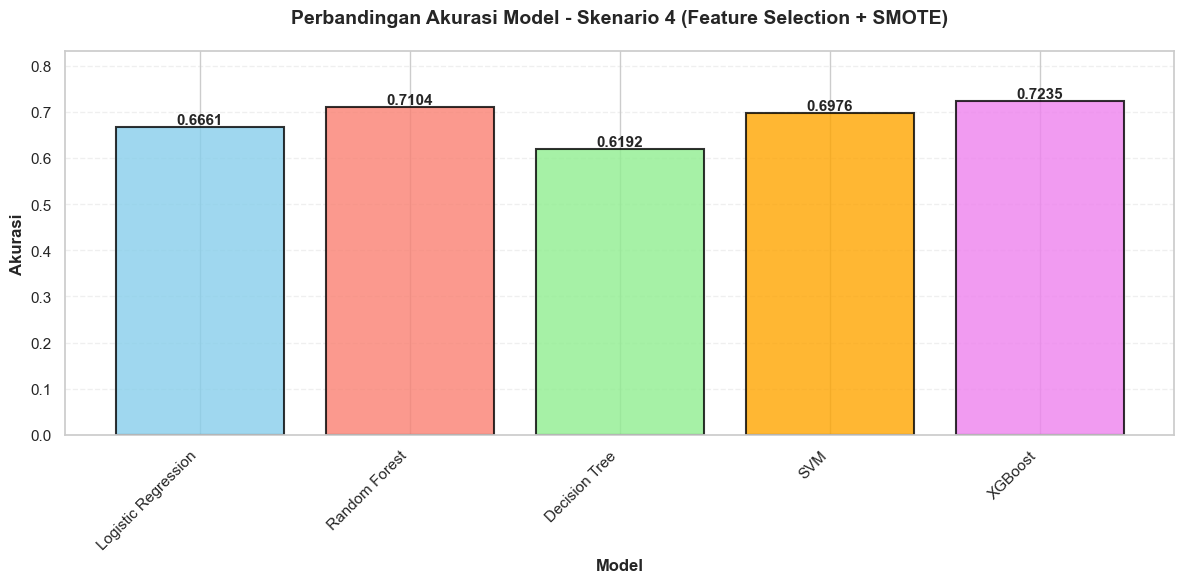


Skenario 4 (Feature Selection + SMOTE)
Model Terbaik: XGBoost
Akurasi Tertinggi: 0.7235
Akurasi Terendah: 0.6192
Rata-rata Akurasi: 0.6834


In [52]:
# Visualisasi Barplot untuk Skenario 4 (Feature Selection + SMOTE)
plt.figure(figsize=(12, 6))

models_list_fs_smote = list(results_MI_SMOTE.keys())
scores_list_fs_smote = list(results_MI_SMOTE.values())

# Buat barplot
bars = plt.bar(models_list_fs_smote, scores_list_fs_smote, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'violet'], 
               edgecolor='black', linewidth=1.5, alpha=0.8)

# Tambahkan nilai akurasi di atas setiap bar
for bar, score in zip(bars, scores_list_fs_smote):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{score:.4f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Perbandingan Akurasi Model - Skenario 4 (Feature Selection + SMOTE)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Model', fontsize=12, fontweight='bold')
plt.ylabel('Akurasi', fontsize=12, fontweight='bold')
plt.ylim(0, max(scores_list_fs_smote) * 1.15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nSkenario 4 (Feature Selection + SMOTE)")
print(f"Model Terbaik: {max(results_MI_SMOTE, key=results_MI_SMOTE.get)}")
print(f"Akurasi Tertinggi: {max(results_MI_SMOTE.values()):.4f}")
print(f"Akurasi Terendah: {min(results_MI_SMOTE.values()):.4f}")
print(f"Rata-rata Akurasi: {sum(results_MI_SMOTE.values())/len(results_MI_SMOTE):.4f}")

# **SKENARIO 5: HYPERPARAMETER TUNING**

In [53]:
preprocessor = ColumnTransformer([
    ("cat",  OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num",  StandardScaler(), num_cols)
])

In [54]:
# Model untuk tuning (menggunakan nama singkat)
models_tune = {
    "LR": LogisticRegression(max_iter=2000),
    "RF": RandomForestClassifier(random_state=42),
    "DT": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "XGB": XGBClassifier(
        objective="multi:softmax",
        num_class=len(np.unique(y_encoded)),
        eval_metric="mlogloss",
        random_state=42
    ),
}

In [55]:
param_spaces = {

    "LR": {
        "model__C": np.logspace(-3, 2, 10),
        "model__penalty": ["l2"],
        "model__solver": ["lbfgs"]
    },

    "RF": {
        "model__n_estimators": [100, 200, 300],
        "model__max_depth": [None, 5, 10, 20],
        "model__min_samples_split": [2, 5, 10]
    },

    "DT": {
        "model__max_depth": [None, 5, 10, 20],
        "model__criterion": ["gini", "entropy"]
    },

    "SVM": {
        "model__C": np.logspace(-2, 2, 8),
        "model__kernel": ["rbf", "poly"],
        "model__gamma": ["scale", "auto"]
    },

    "XGB": {
        "model__n_estimators": [100, 200, 300],
        "model__max_depth": [3, 5, 7, 10],
        "model__learning_rate": [0.01, 0.05, 0.1],
        "model__subsample": [0.5, 0.7, 1.0],
    }
}

In [56]:
import warnings
warnings.filterwarnings("ignore")

best_models = {}
results_cv_best = {}

for name, model in models_tune.items():
    print(f"\n{'='*40}")
    print(f"TUNING MODEL: {name}")
    print('='*40)

    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])

    # Randomized Search (broad search)
    rand_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_spaces[name],
        n_iter=15,
        scoring="accuracy",
        n_jobs=-1,
        cv=3,
        random_state=42
    )

    rand_search.fit(X_train_raw, y_train)
    print(f"Best params (Randomized): {rand_search.best_params_}")

    # Grid Search (refinement)
    best_params = rand_search.best_params_
    refined_space = {
        k: [best_params[k]] if not isinstance(best_params[k], list) else best_params[k]
        for k in best_params
    }

    grid_search = GridSearchCV(
        pipeline,
        param_grid=refined_space,
        scoring="accuracy",
        cv=3,
        n_jobs=-1
    )

    grid_search.fit(X_train_raw, y_train)


    best_cv_score = grid_search.best_score_ # Mengambil skor CV terbaik dari GridSearchCV
    
    print(f"Best params FINAL: {grid_search.best_params_}")
    print(f"Best CV accuracy: {best_cv_score:.4f}")

    best_models[name] = grid_search.best_estimator_
    results_cv_best[name] = best_cv_score #


TUNING MODEL: LR
Best params (Randomized): {'model__solver': 'lbfgs', 'model__penalty': 'l2', 'model__C': np.float64(100.0)}
Best params FINAL: {'model__C': np.float64(100.0), 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best CV accuracy: 0.7031

TUNING MODEL: RF
Best params (Randomized): {'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__max_depth': None}
Best params FINAL: {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best CV accuracy: 0.7299

TUNING MODEL: DT
Best params (Randomized): {'model__max_depth': 10, 'model__criterion': 'entropy'}
Best params FINAL: {'model__criterion': 'entropy', 'model__max_depth': 10}
Best CV accuracy: 0.6940

TUNING MODEL: SVM
Best params (Randomized): {'model__kernel': 'rbf', 'model__gamma': 'scale', 'model__C': np.float64(1.9306977288832496)}
Best params FINAL: {'model__C': np.float64(1.9306977288832496), 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best CV accuracy: 0.7212

TUNING MOD

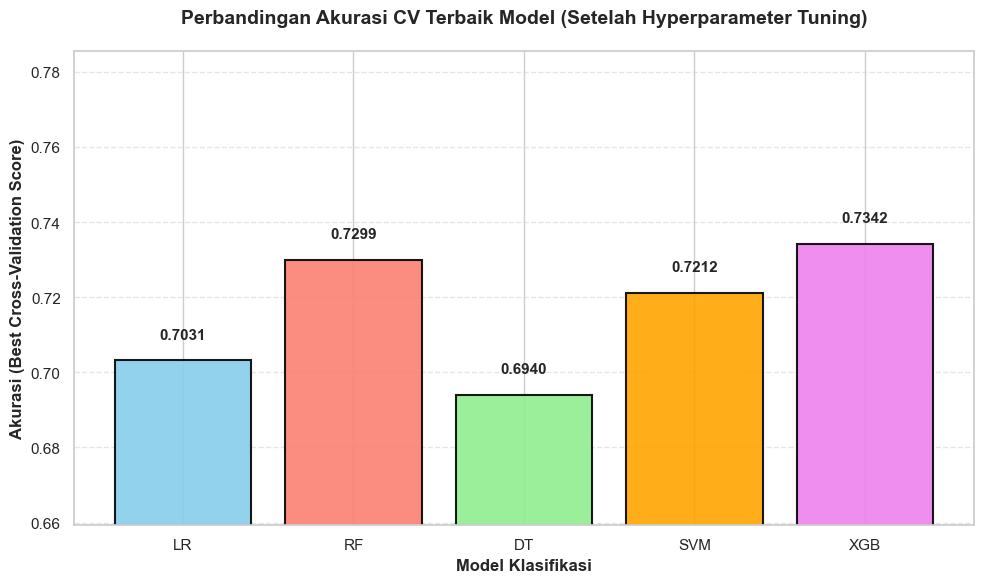


--- Skenario 5 (Hyperparameter Tuning) - Akurasi CV Terbaik ---
Model Terbaik: XGB
Akurasi Tertinggi: 0.7342
Akurasi Terendah: 0.6940
Rata-rata Akurasi: 0.7165


In [57]:
data_to_plot = results_cv_best

plt.figure(figsize=(10, 6))

models_list_tuned = list(data_to_plot.keys())
scores_list_tuned = list(data_to_plot.values())

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet'] 
bars = plt.bar(models_list_tuned, scores_list_tuned, 
               color=colors, 
               edgecolor='black', linewidth=1.5, alpha=0.9)

for bar, score in zip(bars, scores_list_tuned):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{score:.4f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Perbandingan Akurasi CV Terbaik Model (Setelah Hyperparameter Tuning)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Model Klasifikasi', fontsize=12, fontweight='bold')
plt.ylabel('Akurasi (Best Cross-Validation Score)', fontsize=12, fontweight='bold')
min_score = min(scores_list_tuned)
max_score = max(scores_list_tuned)
plt.ylim(min_score * 0.95, max_score * 1.07) 
plt.xticks(rotation=0, ha='center') 
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("\n--- Skenario 5 (Hyperparameter Tuning) - Akurasi CV Terbaik ---")
print(f"Model Terbaik: {max(data_to_plot, key=data_to_plot.get)}")
print(f"Akurasi Tertinggi: {max(data_to_plot.values()):.4f}")
print(f"Akurasi Terendah: {min(data_to_plot.values()):.4f}")
print(f"Rata-rata Akurasi: {sum(data_to_plot.values())/len(data_to_plot):.4f}")

# **SKENARIO 6: FEATURE SELECTION + HYPERPARAMETER TUNING**

In [ ]:
best_models_MI = {}

param_spaces_MI_dict = {
    "Logistic Regression": {
        "C": np.logspace(-3, 2, 10),
        "penalty": ["l2"],
        "solver": ["lbfgs"]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "criterion": ["gini", "entropy"]
    },
    "SVM": {
        "C": np.logspace(-2, 2, 8),
        "kernel": ["rbf", "poly"],
        "gamma": ["scale", "auto"]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 5, 7, 10],
        "learning_rate": [0.01, 0.05, 0.1],
        "subsample": [0.5, 0.7, 1.0],
    }
}

models_MI_tune = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(
        objective='multi:softprob',
        num_class=len(le_target.classes_),
        eval_metric='mlogloss',
        tree_method='hist',
        random_state=42
    )
}

for name, model in models_MI_tune.items():
    print(f"\n{'='*50}")
    print(f"TUNING MODEL (FS + MI) with PRE-PROCESSED data: {name}")
    print('='*50)

    estimator_to_tune = model 
    param_spaces_MI = param_spaces_MI_dict[name]

    # Randomized Search
    rand_search_MI = RandomizedSearchCV(
        estimator=estimator_to_tune, 
        param_distributions=param_spaces_MI,
        n_iter=15,
        scoring="accuracy",
        n_jobs=-1,
        cv=3,
        random_state=42
    )

    rand_search_MI.fit(X_train_MI_pre, y_train_MI_enc) 
    print(f"Best params (Randomized): {rand_search_MI.best_params_}")

    # Refinement GridSearch
    best_params_MI = rand_search_MI.best_params_
    refined_space_MI = {
        k: [best_params_MI[k]] if not isinstance(best_params_MI[k], list) else best_params_MI[k]
        for k in best_params_MI
    }

    grid_search_MI = GridSearchCV(
        estimator=estimator_to_tune, 
        param_grid=refined_space_MI,
        scoring="accuracy",
        cv=3,
        n_jobs=-1
    )

    grid_search_MI.fit(X_train_MI_pre, y_train_MI_enc)

    print(f"Best params FINAL: {grid_search_MI.best_params_}")
    print(f"Best CV accuracy: {grid_search_MI.best_score_:.4f}")

    best_models_MI[name] = grid_search_MI.best_estimator_

    # Test accuracy
    y_pred_MI = grid_search_MI.best_estimator_.predict(X_test_MI_pre) 
    test_acc = accuracy_score(y_test_MI_enc, y_pred_MI)
    print(f"Test Accuracy: {test_acc:.4f}")

    # Konversi hasil prediksi dan testing ke label asli untuk Classification Report
    y_test_labels = le_target.inverse_transform(y_test_MI_enc)
    y_pred_labels = le_target.inverse_transform(y_pred_MI) 

    print("\nClassification Report:")
    print(classification_report(y_test_labels, y_pred_labels))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test_labels, y_pred_labels))



TUNING MODEL (FS + MI) with PRE-PROCESSED data: Logistic Regression
Best params (Randomized): {'solver': 'lbfgs', 'penalty': 'l2', 'C': np.float64(27.825594022071257)}
Best params FINAL: {'C': np.float64(27.825594022071257), 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV accuracy: 0.7020
Test Accuracy: 0.7089

Classification Report:
              precision    recall  f1-score   support

 Distinction       0.64      0.45      0.53       529
        Fail       0.59      0.42      0.49      1253
        Pass       0.73      0.89      0.80      2167
   Withdrawn       0.75      0.77      0.76      1808

    accuracy                           0.71      5757
   macro avg       0.68      0.63      0.64      5757
weighted avg       0.70      0.71      0.70      5757


Confusion Matrix:
[[ 237    3  285    4]
 [   4  523  297  429]
 [ 114  107 1926   20]
 [  16  252  145 1395]]

TUNING MODEL (FS + MI) with PRE-PROCESSED data: Random Forest
Best params (Randomized): {'n_estimators': 300, 'min_samp

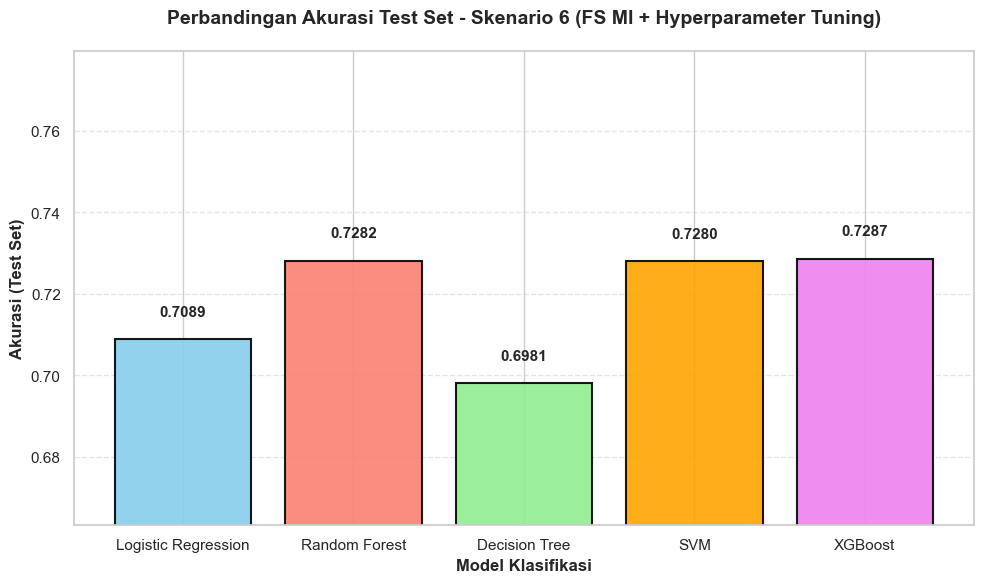


--- Skenario 6 (Hyperparameter Tuning + Feature Selection) - Akurasi Test Set ---
Model Terbaik: XGBoost
Akurasi Tertinggi: 0.7287
Akurasi Terendah: 0.6981
Rata-rata Akurasi: 0.7184


In [ ]:
results_MI_tuned = {}

for name, best_model in best_models_MI.items():
    y_pred_MI = best_model.predict(X_test_MI_pre) 
    acc = accuracy_score(y_test_MI_enc, y_pred_MI)
    results_MI_tuned[name] = acc 

data_to_plot = results_MI_tuned 

plt.figure(figsize=(10, 6))

models_list_mi_tuned = list(data_to_plot.keys())
scores_list_mi_tuned = list(data_to_plot.values())

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet'] 

# Membuat bar chart
bars = plt.bar(models_list_mi_tuned, scores_list_mi_tuned, 
               color=colors, 
               edgecolor='black', linewidth=1.5, alpha=0.9) 

for bar, score in zip(bars, scores_list_mi_tuned):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005, 
             f'{score:.4f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Perbandingan Akurasi Test Set - Skenario 6 (FS MI + Hyperparameter Tuning)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Model Klasifikasi', fontsize=12, fontweight='bold')
plt.ylabel('Akurasi (Test Set)', fontsize=12, fontweight='bold')

min_score = min(scores_list_mi_tuned)
max_score = max(scores_list_mi_tuned)
plt.ylim(min_score * 0.95, max_score * 1.07) 

plt.xticks(rotation=0, ha='center') 
plt.grid(axis='y', linestyle='--', alpha=0.5) 
plt.tight_layout()
plt.show()

print("\n--- Skenario 6 (Hyperparameter Tuning + Feature Selection) - Akurasi Test Set ---")
print(f"Model Terbaik: {max(results_MI_tuned, key=results_MI_tuned.get)}")
print(f"Akurasi Tertinggi: {max(results_MI_tuned.values()):.4f}")
print(f"Akurasi Terendah: {min(results_MI_tuned.values()):.4f}")
print(f"Rata-rata Akurasi: {sum(results_MI_tuned.values())/len(results_MI_tuned):.4f}")


In [60]:
def standardize_model_keys(data_dict):
    """Menyeragamkan kunci dictionary model (mis. 'Logistic Regression' menjadi 'LR')."""
    key_map = {
        "Logistic Regression": "LR",
        "Random Forest": "RF",
        "Decision Tree": "DT",
        "SVM": "SVM",
        "XGBoost": "XGB",
        "LR": "LR",  
        "RF": "RF",
        "DT": "DT",
    }

    standardized_dict = {key_map.get(k, k): v for k, v in data_dict.items()}
    
    if 'XGBoost' in standardized_dict:
        standardized_dict['XGB'] = standardized_dict.pop('XGBoost')
    
    return standardized_dict

try:
    baseline_scores_std = standardize_model_keys(baseline_scores)
    results_smote_std = standardize_model_keys(results_smote)
    results_MI_std = standardize_model_keys(results_MI)
    results_MI_SMOTE_std = standardize_model_keys(results_MI_SMOTE)
    results_cv_best_std = standardize_model_keys(results_cv_best) 
    results_MI_tuned_std = standardize_model_keys(results_MI_tuned) 

except NameError as e:
    print(f"Error: Salah satu dictionary sumber data tidak ditemukan ({e})")


df_results = pd.DataFrame({
    'Baseline': baseline_scores_std,
    'SMOTE': results_smote_std,
    'Feature Selection': results_MI_std,
    'FS + SMOTE': results_MI_SMOTE_std,
    'Hyperparameter Tuning': results_cv_best_std, 
    'FS + Tuning': results_MI_tuned_std
}).T

df_melted = df_results.reset_index().rename(columns={'index': 'Skenario'}).melt(
    id_vars='Skenario', var_name='Model', value_name='Akurasi'
).dropna(subset=['Akurasi']) 

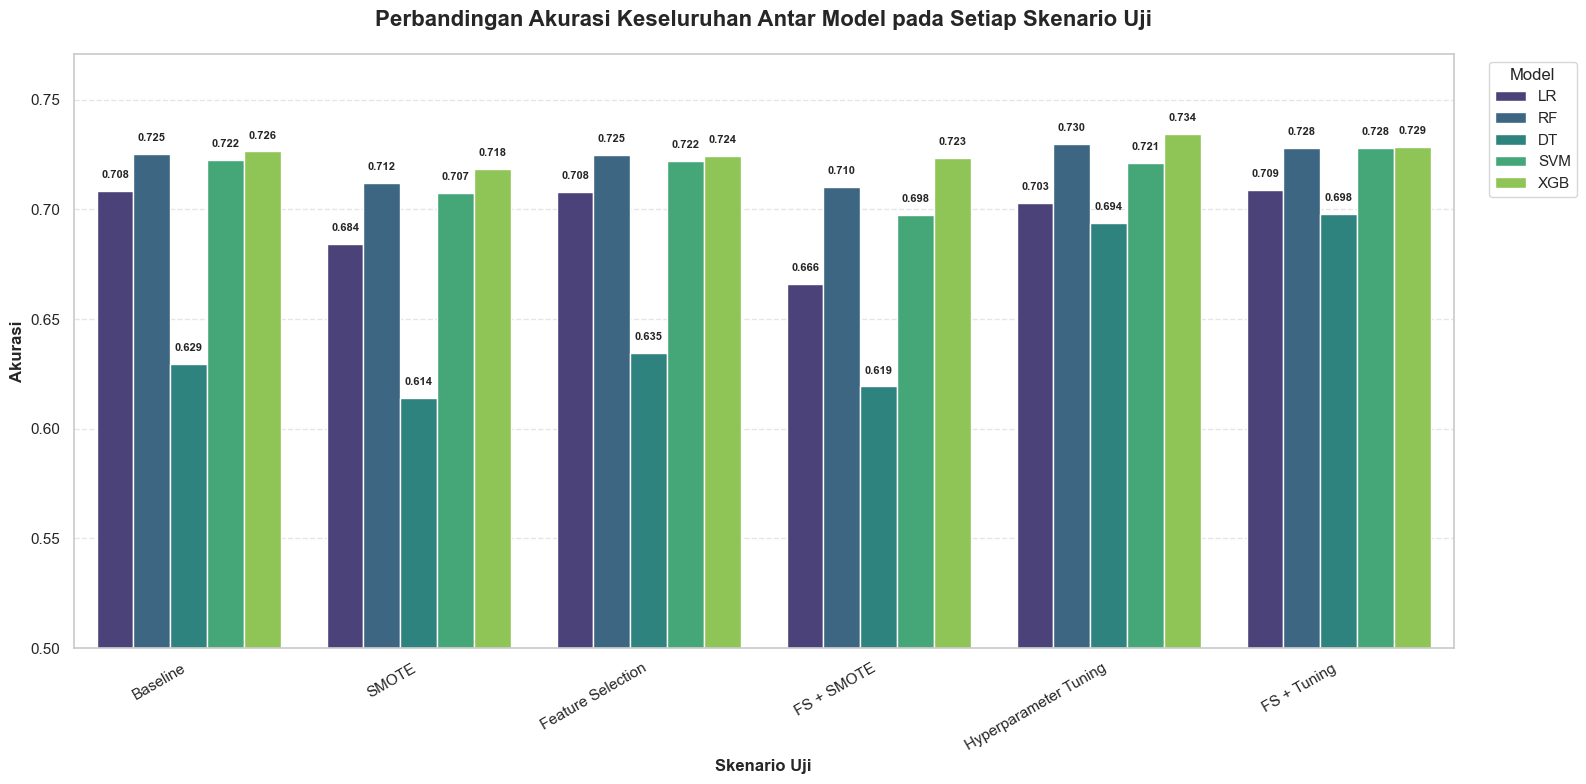

In [61]:
plt.figure(figsize=(16, 8)) 
ax = sns.barplot(x='Skenario', y='Akurasi', hue='Model', data=df_melted, palette='viridis')
plt.title('Perbandingan Akurasi Keseluruhan Antar Model pada Setiap Skenario Uji', fontsize=16, fontweight='bold', pad=20)
plt.ylim(0.5, max(df_melted['Akurasi']) * 1.05) 
plt.ylabel('Akurasi', fontsize=12, fontweight='bold')
plt.xlabel('Skenario Uji', fontsize=12, fontweight='bold')
plt.legend(title='Model', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=True) 
plt.xticks(rotation=30, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.5)

for p in ax.patches:
    height = p.get_height()
    if pd.notna(height) and height > 0: 
        ax.text(p.get_x() + p.get_width() / 2., 
                height + 0.005, 
                f'{height:.3f}', 
                ha='center', va='bottom', 
                fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()